# Prudential Multiple Consensus model

# I. Understand the data

## 1.1 Summary

Due to confidential reasons, only three fields of data are known:
* **Time**: the seconds elapsed between each transaction and the first transaction in the dataset
* **Amount**: the transaction amount
* **Class**: the class feature that give information about each transaction was fraud or not (1 for fraud and 0 for legitimate)

During exploring, the data has shown some remarkable characteristics:
* There is no **NaN** or **Null** values found
* The data is extremely imbalanced with **99.83%** for legitimate txn and **0.17%** for fraud txn

## 1.2 Quick look at the data

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Apply the default theme
sns.set_theme()
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [5]:
# Import the data
data = pd.read_csv("creditcard.csv")
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


## 1.3 Checking for Null values

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# Check for total null values
data.isna().sum().sum()

0

In [10]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
data.describe().iloc[:,-2:]

,Amount,Class
count,284807.000000,284807.000000
mean,88.349619,0.001727
std,250.120109,0.041527
min,0.000000,0.000000
25%,5.600000,0.000000
50%,22.000000,0.000000
75%,77.165000,0.000000
max,25691.160000,1.000000


In [12]:
# The classes are heavily skewed we need to solve this issue later.
num_legit = int(data.loc[data['Class'] == 0,'Class'].value_counts())
num_fraud = int(data.loc[data['Class'] == 1,'Class'].value_counts())

print('No. legitimate txns :',num_legit)
print('No. fraudulent txns :',num_fraud)
print()
print('Legitimate txns account for %.4f%% of total transaction'% float(data.loc[data['Class'] == 0,'Class'].value_counts()/len(data)*100))
print('Fraudulentb txns account for %.4f%% of total transaction'% float(data.loc[data['Class'] == 1,'Class'].value_counts()/len(data)*100))

No. legitimate txns : 284315
No. fraudulent txns : 492

Legitimate txns account for 99.8273% of total transaction
Fraudulentb txns account for 0.1727% of total transaction


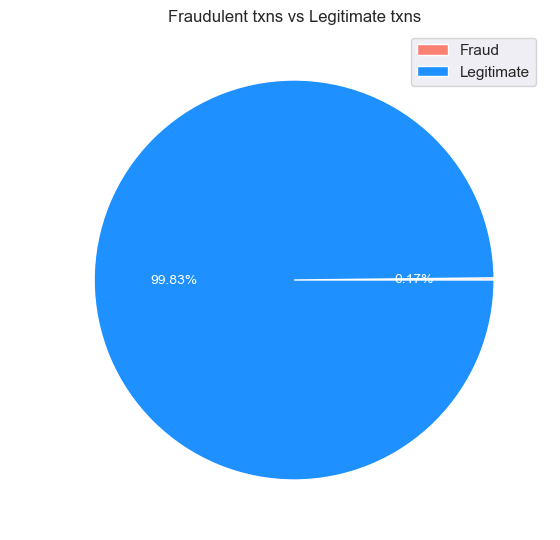

In [13]:
fig_imba = plt.figure(figsize = [6,5], dpi=100)
axes_imba = fig_imba.add_axes([0, 0, 1, 1])

# plot class ratio pie chart
def plot_class_ratio(num_fraud, num_legit, startangle=0):
    # Create a pie chart of the two type of class
    types = ['Fraud', 'Legitimate']
    num_class = [num_fraud, num_legit]

    colors=['salmon', 'dodgerblue']


    # Provide values, what to explode and by how much, labels, colors, pct for values,
    # whether to shadow, amount to rotate pie, pie text color
    wedges, text, autotexts = plt.pie(num_class, labels=types, colors=colors,
                                     shadow=False, autopct='%.2f%%',
                                     startangle=startangle, textprops=dict(color='w', fontsize='small'))
    plt.legend(wedges, types, loc=0, bbox_to_anchor=[1, 1])
    plt.title('Fraudulent txns vs Legitimate txns')

plot_class_ratio(num_fraud, num_legit)   

## 1.4 Analyze two known columns

In [14]:
from sklearn.preprocessing import PowerTransformer
def yeojohntrans(feature, data=data):   # function to apply transformer and check the distribution with histogram and kdeplot
    
    yeojohnTr = PowerTransformer(standardize=True)   # not using method attribute as yeo-johnson is the default

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(data[feature], bins=80, kde=True, color="red")
    plt.subplot(1,2,2)
    
    df_yeojohn = pd.DataFrame(yeojohnTr.fit_transform(data[feature].values.reshape(-1,1)))
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_yeojohn,bins=80, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()
    
    old_skew = data.loc[:,[feature]].skew()
    old_kurtosis = data.loc[:,[feature]].kurtosis()
    print(f"Skewness was {round(old_skew[feature],2)} before & is {round(df_yeojohn.skew()[0],2)} after Yeo-johnson transformation.")
    print(f"kurtosis was {round(old_kurtosis[feature],2)} before & is {round(df_yeojohn.kurtosis()[0],2)} after Yeo-johnson transformation.")

In [26]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import PowerTransformer

def binning_analyze(feature, data=data, transform=False):
    # Bining Time Columns for EDA
    kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
    df_data = data.loc[:,[feature,'Class']].copy()
    yeojohnTr = PowerTransformer(standardize=True) 
    
    if (transform == True):
        df_data.loc[:,['Amount']]  = yeojohnTr.fit_transform(data['Amount'].values.reshape(-1,1))
    
    df_data.loc[:,[feature]] = kbins.fit_transform(df_data.loc[:,[feature]])

    # Create Visual DataFrame to comparison between fraud and total txn
    df_visual= pd.DataFrame(
                            {feature : df_data[feature].unique(), 
                             "Total txns" : df_data.groupby(feature).agg({feature: 'count'}).values.flatten(), 
                             'Fraud txns' : df_data.groupby(feature).agg({'Class': 'sum'}).values.flatten()}
                            )

    # Set up visualization
    fig, ax = plt.subplots(2,2, figsize=(13, 11), gridspec_kw={'wspace': 0.2, 'hspace': 0.3})

    # Plot number of fraud and total txn 
    sns.lineplot(data=df_visual, x=feature, y='Fraud txns', ax=ax[0,0], color='salmon')
    ax[0,0].legend(['Fraud txns'], loc='lower right')
    ax[0,0].set_title(f"Number of fraud transaction by {feature}")

    sns.lineplot(data=df_visual, x=feature, y='Total txns', ax=ax[0,1], color='dodgerblue')
    ax[0,1].legend(['Total txns'], loc='lower right')
    ax[0,1].set_title(f"Number of transaction by {feature}")


    df_visual['Total txns'] = df_visual['Total txns']/df_visual['Total txns'].sum()
    df_visual['Fraud txns'] = df_visual['Fraud txns']/df_visual['Fraud txns'].sum()

    df_visual
    df_visual_melted = pd.melt(df_visual, id_vars=feature)
    df_visual_melted.rename(columns={'variable':'Transaction', 'value':'Value'}, inplace=True)


    # Plot the first bar plot with sum as the estimator
    sns.lineplot(data=df_visual_melted, x=feature, y='Value', hue='Transaction', ax=ax[1,0], palette=['salmon', 'dodgerblue'])

    # Set the labels and title
    ax[1,0].set_title(f"Fraud transaction vs Total transaction")
    ax[1,0].set_xlabel(feature)
    ax[1,0].set_ylabel('Percentage')
    ax[1,0].set_title('Two Bar Plots')

    #
    df_visual['Gap'] = abs(df_visual['Total txns']-df_visual['Fraud txns'])
    sns.barplot(data=df_visual, x=feature, y='Gap', ax=ax[1,1], color='purple')
    ax[1,1].set_title(f"Gap between Fraud and Total Transaction (%)")


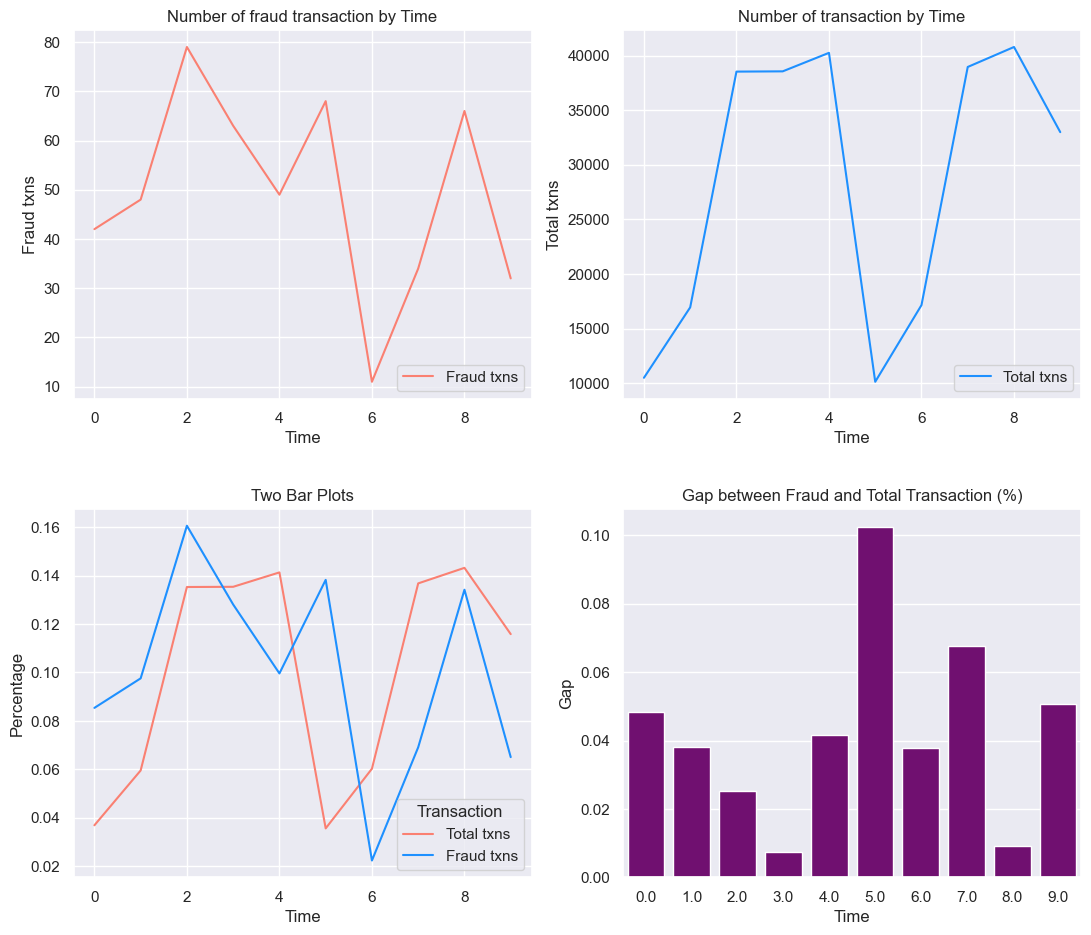

In [27]:
binning_analyze(feature='Time', data=data)
plt.savefig('time_atribute.png')

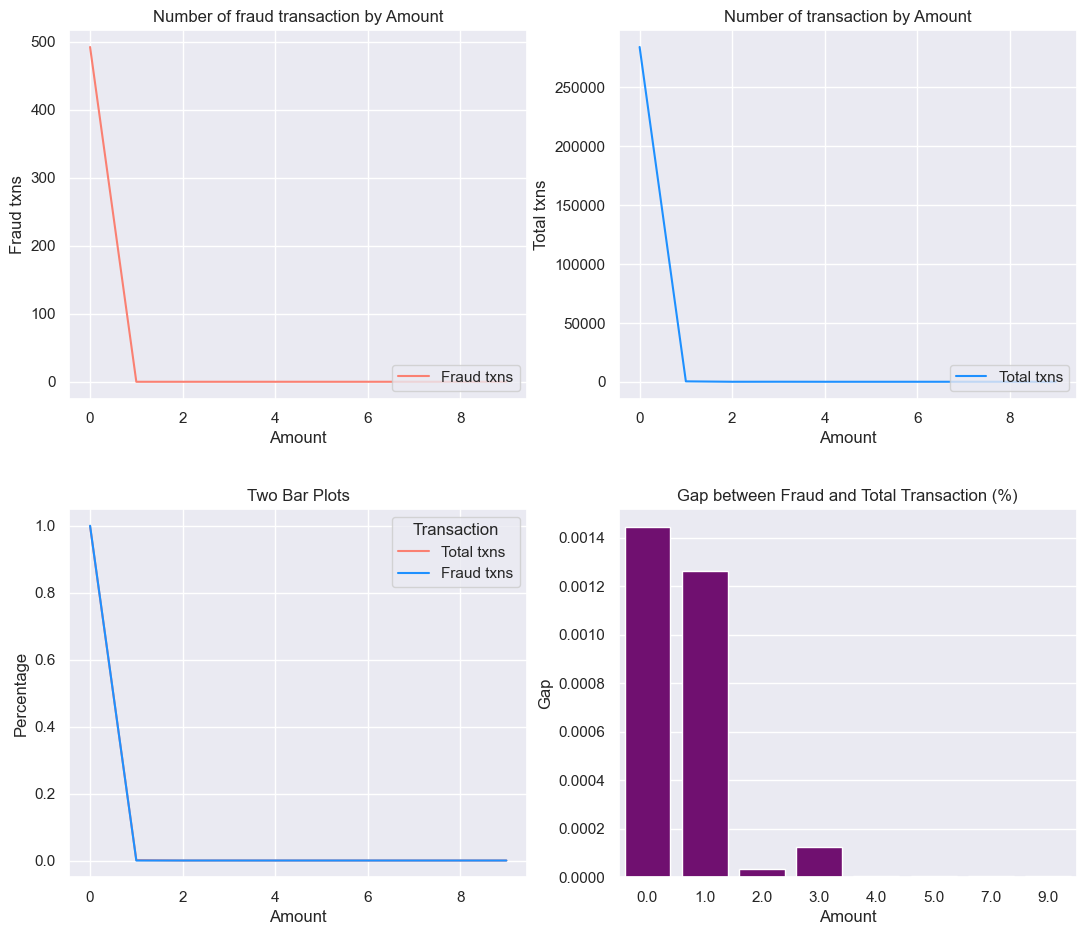

In [31]:
binning_analyze(feature='Amount', data=data, transform=False)
plt.savefig('amount_atribute.png')

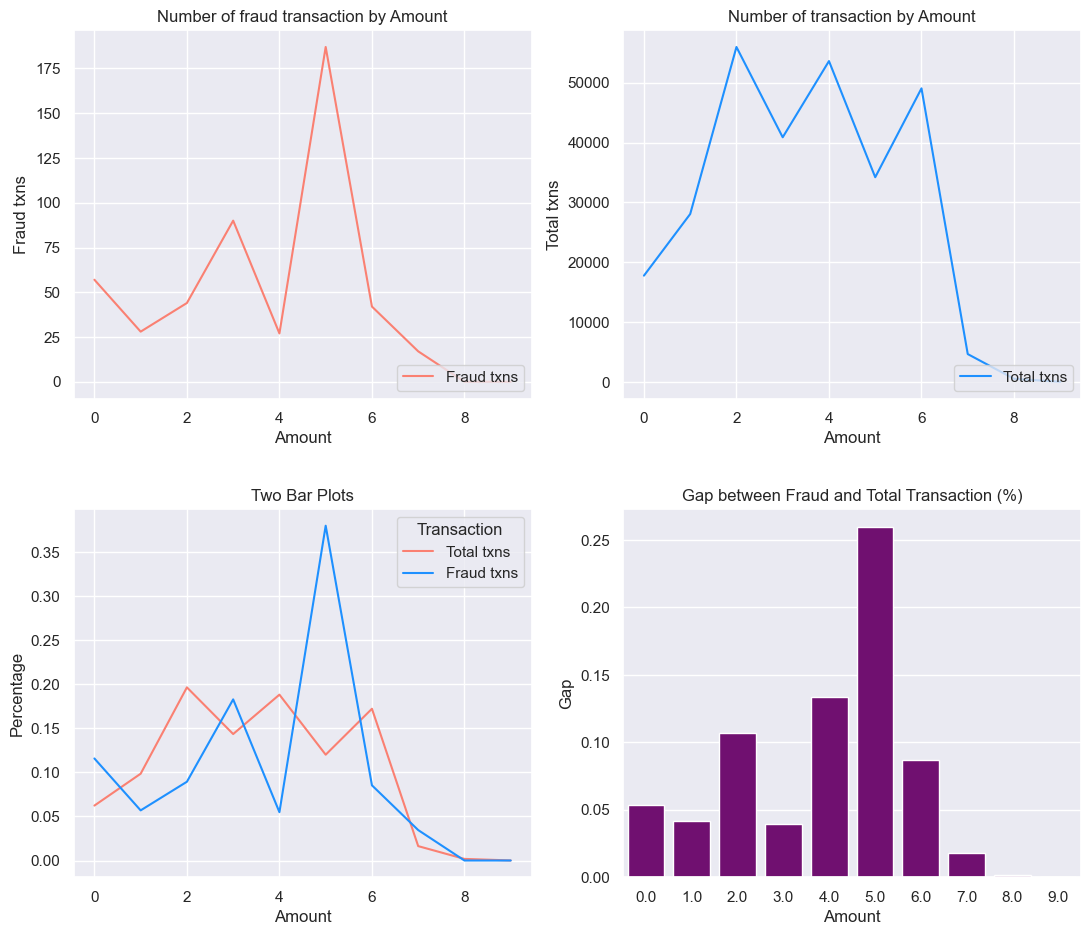

In [29]:
binning_analyze(feature='Amount', data=data, transform=True)

# 2 Data Pre-Processing

## 2.1 Initialize

Before spliting, I **keep all 30 features** for training the model. This is because 
* For the unknown features, since I do not have much data about these data, excluding anyone of them can cause information loss.
* For known features, I still keep Time and Amount feature since fraudster may target in some specific amount payment or time during the days (proved).

When splitting: 
* Spliting them with the ratio of 80/20 and random_state=1 for reproducing purpose

### 2.1.1 Inputing algorithms and metrics

In [32]:
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Initialize algorithms
algorithms =["MLP", "GNB", "ADA", "GBC", "RFC"]

classifiers = {
  "MLP": MLPClassifier(random_state=33),
  "GNB": GaussianNB(),
  "ADA": AdaBoostClassifier(random_state=33),
  "GBC": GradientBoostingClassifier(random_state=33),
  "RFC": RandomForestClassifier(random_state=33),
    }

# Initialize metrics
metrics = ['Sensitivity', 'Fallout', 'AUC']
sensi_score = np.zeros([10,5])
fallout_score = np.zeros([10,5])
auc_score = np.zeros([10,5])

dict_score = {'Sensitivity': sensi_score, 'Fallout' : fallout_score, 'AUC' : auc_score}

### 2.1.1 Metrics Calculation

In [33]:
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import roc_curve, auc

# Create the class for calculating metric
class metric_score:
    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred
        self.tn, self.fp, self.fn, self.tp = cm(y_true,y_pred).ravel()
    
    def sensi_score(self):
      return self.tp/(self.tp+self.fn)

    def fallout_score(self):
      return self.fp/(self.fp+self.tn)

    def auc_score(self):
        fpr, tpr, thresholds  = roc_curve(self.y_true, self.y_pred)
        return auc(fpr, tpr)

### 2.1.2 Performance Comparison

In [34]:
def plot_algo_comparison(dict_score):
    fig_score, axes_score = plt.subplots(figsize=(8,8), nrows=3, ncols=1)
    
    # Calculate each metrics
    for index_metric, value_metric in enumerate(metrics[:3]):
        fig_score.tight_layout()
        bar = sns.barplot(data=pd.DataFrame(dict_score[value_metric], columns=algorithms) ,ax=axes_score[index_metric], orient='h',
                    color="salmon", capsize=.2, errcolor="0.8", linewidth=0, )
        axes_score[index_metric].set_title(f'{value_metric}')

        # Add data labels to each bar
        for i, p in enumerate(bar.patches):
            width = p.get_width()
            mean_value = format(width, '.3f')
            std_value = format(np.std(dict_score[value_metric][:,i]), '.3f')
            label_text = f'{mean_value} +/- {std_value}'
            axes_score[index_metric].text(width + 0.05*width , p.get_y() + p.get_height() / 2, label_text,
                 ha='left', va='center', color='grey', fontweight='medium')

def bf_af_comparison(dict_score_bf, dict_score_af, score='AUC', hue="Sampling", bf="Before", af="After"):
    
    # Create DataFrame for bf data
    df_bf = pd.DataFrame(dict_score_bf[score], columns=classifiers.keys())
    df_bf.reset_index(inplace=True)
    df_bf.rename(columns={"index": "Fold"}, inplace=True)
    df_bf.Fold +=1
    df_bf[hue] = bf
    
    # Create DataFrame for af data
    df_af = pd.DataFrame(dict_score_af[score], columns=classifiers.keys())
    df_af.reset_index(inplace=True)
    df_af.rename(columns={"index": "Fold"}, inplace=True)
    df_af.Fold +=1
    df_af[hue] = af

    # Merge two DataFrame
    merged_df = pd.concat([df_bf, df_af])
    
    # Unpivot Data by each Fold and Sampling
    melted_df = pd.melt(merged_df, id_vars=['Fold', hue], var_name='Algorithm', value_name='Performance')
    
    #Plot boxplot for comparison
    fig_score, axes_score = plt.subplots(figsize=(8,8), nrows=1, ncols=1)
    sns.boxplot(x='Algorithm', y='Performance', hue=hue, data=melted_df, palette="pastel", ax=axes_score)
    axes_score.set_title(score)

## 2.2 Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## 2.4 Feature Selection

### 2.4.1 Data Correlation and Multicollinearity

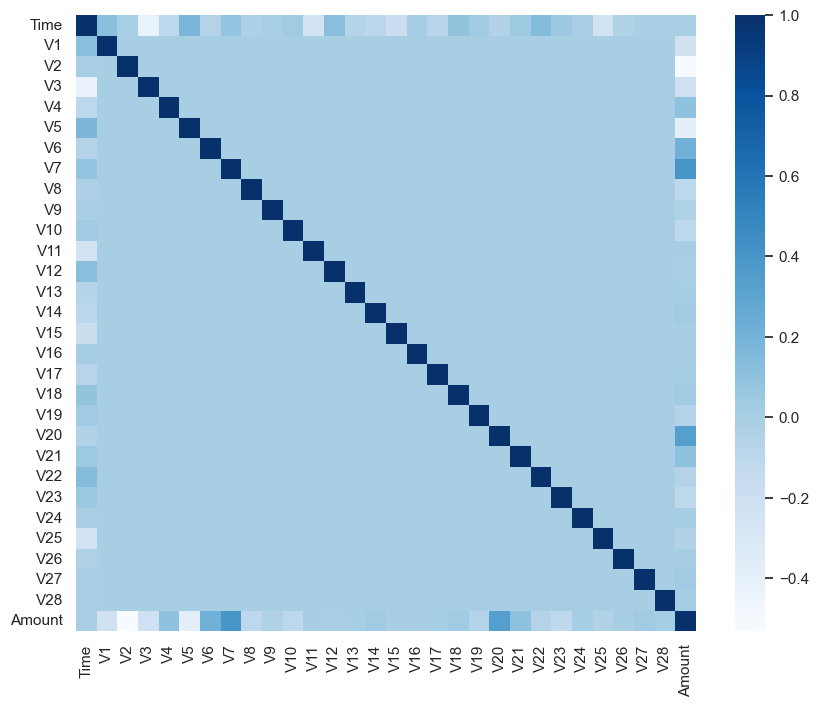

In [63]:
#Plot correlation matrix
import seaborn as sns
 
# checking correlation using heatmap
feat_labels = data.columns[:-1]  
df_data = pd.DataFrame(data.iloc[:, :-1], columns=feat_labels)
df_label = data.iloc[:,-1]  

#plotting the heatmap for correlation
plt.figure(figsize = [10,8], dpi=100)
axes_corr_mat = sns.heatmap(df_data.corr(), annot=False, cmap='Blues', fmt='.1f')
plt.savefig('Correlation matrix')

In [96]:
mask = (df_data.corr()<1)

df_max_corr = pd.DataFrame(round(df_data.corr()[mask].max(),3), columns=['Maximum Correlation Value']).reset_index()
df_max_corr.rename(columns={'index': 'Atribute'}, inplace=True)
df_max_corr = pd.concat([df_max_corr.head(15), df_max_corr.tail(15).reset_index()],  axis=1)
df_max_corr.drop(columns='index', inplace=True)
# df_max_corr.head(15)
df_max_corr

,Atribute,Maximum Correlation Value,Atribute,Maximum Correlation Value
0,Time,0.173,V15,0.000
1,V1,0.117,V16,0.012
2,V2,0.000,V17,0.007
3,V3,0.000,V18,0.090
4,V4,0.099,V19,0.029
5,V5,0.173,V20,0.339
6,V6,0.216,V21,0.106
7,V7,0.397,V22,0.144
8,V8,0.000,V23,0.051
9,V9,0.000,V24,0.005


In [17]:
df_data.corr()[mask].max()[df_data.corr()[mask].max()>0.2]

V6        0.215981
V7        0.397311
V20       0.339403
Amount    0.397311
dtype: float64

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


df_vif = calc_vif(df_data)

In [19]:
df_vif[df_vif["VIF"]> 2]

,variables,VIF
0,Time,2.339084
2,V2,3.869377
5,V5,2.753075
7,V7,2.510165
20,V20,2.233934
29,Amount,11.499791


In [21]:
# Remove Amount column
df_vif = calc_vif(df_data.drop(columns='Amount'))
df_vif[df_vif["VIF"]> 2]

,variables,VIF


In [23]:
data.drop(columns="Amount", inplace=True)
X = data.iloc[:, :-1].values
X.shape

(284807, 29)

### 2.4.2 Correlation with target variable

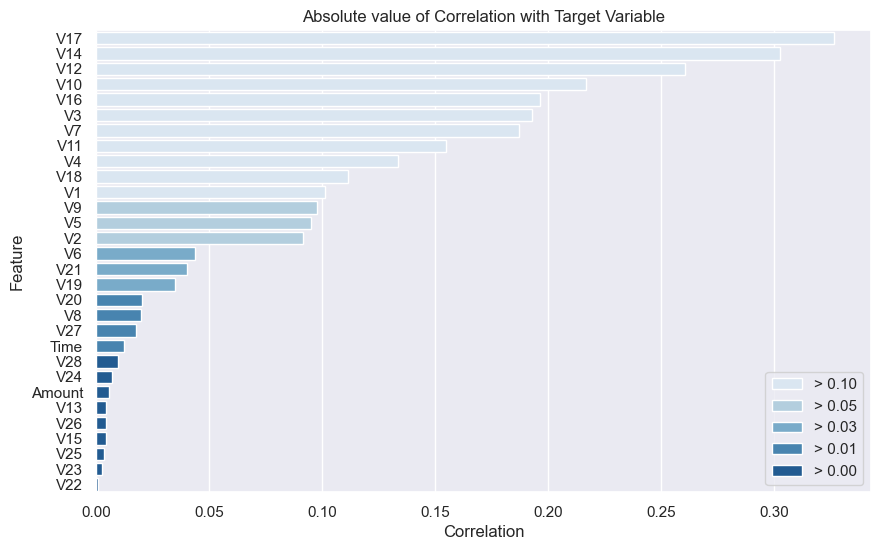

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame called 'data' with features and target variable

# Calculate the correlation matrix
corr_matrix = data.corr()

# Extract the correlations with the target variable
corr_with_target = corr_matrix['Class']

# Create a DataFrame with correlation values and feature names
df_corr = pd.DataFrame({'Feature': corr_with_target.index[:-1], 'Correlation': abs(corr_with_target.values[:-1])})

# Sort the DataFrame by correlation values
df_corr = df_corr.sort_values(by='Correlation', ascending=False)

# Define the threshold categories
threshold_bins = [0, 0.01, 0.03, 0.05, 0.1, 1.0]
threshold_labels = ['> 0.00', '> 0.01', '> 0.03', '> 0.05', '> 0.10']

# Assign the threshold categories to the Correlation column
df_corr['Threshold'] = pd.cut(df_corr['Correlation'], bins=threshold_bins, labels=threshold_labels)

# Plotting the correlation using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation', y='Feature', data=df_corr, hue='Threshold', palette='Blues_r',  dodge=False)
plt.title('Absolute value of Correlation with Target Variable')
plt.xlabel('Correlation')
plt.ylabel('Feature')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1])
plt.show()

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit

list_corr_theshold = [0, 0.01, 0.03, 0.05, 0.1]
threshold_score = np.zeros([len(algorithms), len(list_corr_theshold)])

for index_threshold, threshold in enumerate(list_corr_theshold):
    mask = df_corr['Correlation']>threshold
    subset_columns = df_corr.Feature[mask].values
    print("Threshold: ",threshold)

    
    tscv = TimeSeriesSplit(n_splits=10, max_train_size=None, test_size=None, gap=0)
    X = data.loc[:, subset_columns].values
    print(X.shape)

    # Make the prediction and take the probability
    pred_value = np.zeros([len(X), len(algorithms)], dtype = np.int32)
    
    auc_score = np.zeros([10,5])

    for i, (train_index, test_index) in enumerate(tscv.split(X)):
        print("Fold ",i)
        for clf_index, clf_name in enumerate(algorithms):
            
            classifiers[clf_name].fit(X[train_index], y[train_index])
            pred_value[[test_index], clf_index:clf_index+1] = classifiers[clf_name].predict(X[test_index]).reshape(-1, 1)

            # Calculate metrics
            metric = metric_score(y[test_index], pred_value[test_index, clf_index])
            auc_score[i, clf_index] = metric.auc_score()
            print(metric.auc_score())
    
    for clf_index, clf_name in enumerate(algorithms):
        
        threshold_score[clf_index, index_threshold] = np.mean(auc_score[:,clf_index])

Threshold:  0
(284807, 29)
Fold  0
0.66929676445206
0.9443729791095031
0.8789741838068987
0.8546257707328222
0.8950838579790907
Fold  1
0.7624613167769138
0.8425147963328304
0.7749613167769139
0.7748452671076554
0.8249613167769138
Fold  2
0.5
0.8630125693358314
0.8571235140348065
0.8571428571428572
0.8571428571428572
Fold  3
0.7930067813514169
0.7866847644927053
0.7929487811967498
0.7929294478118608
0.8275475401267737
Fold  4
0.5
0.9423457287955206
0.9098604410946282
0.6178225013477745
0.9211351528363363
Fold  5
0.5
0.8866354015424618
0.8567564135829392
0.8926639210771837
0.8926639210771837
Fold  6
0.5
0.8043128115008306
0.5516661377763674
0.6550757468686582
0.7930841148909731
Fold  7
0.8620302987474633
0.8559596158923091
0.7757847354259612
0.7240799308798157
0.8448275862068966
Fold  8
0.5
0.8134242784645783
0.8060837522842896
0.7754521590386793
0.8673469387755102
Fold  9
0.7856563034954995
0.7350221804995675
0.7855789938704513
0.6189703094225707
0.8332946785208091
Threshold:  0.01
(28

In [223]:
threshold_score = pd.read_csv('threshold_score.csv')

In [244]:
list_corr_theshold = [0, 0.01, 0.03, 0.05, 0.1]
df_threshold_score = pd.DataFrame(np.array(threshold_score), index=algorithms, columns=list_corr_theshold)
df_threshold_score 

,0.00,0.01,0.03,0.05,0.10
MLP,0.637245,0.663695,0.815638,0.802246,0.798632
GNB,0.847429,0.847079,0.891219,0.896055,0.899430
ADA,0.798974,0.801339,0.809259,0.809370,0.788731
GBC,0.756361,0.740472,0.730769,0.721708,0.789124
RFC,0.855709,0.857890,0.867134,0.855011,0.857089


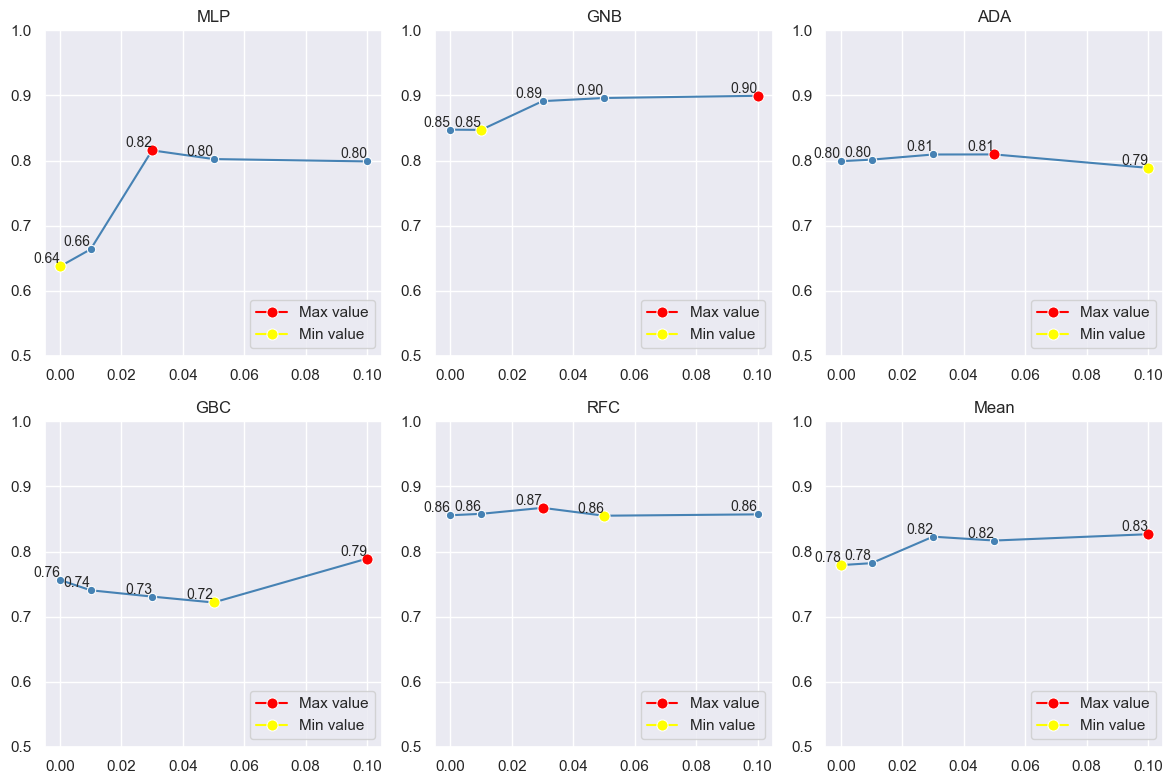

In [245]:
df_threshold_score.loc['Mean'] = np.mean(df_threshold_score, axis=0)

plt.figure(figsize=(12, 8))

for clf_index, clf_name in enumerate(df_threshold_score.index):
  ax = plt.subplot(2, 3, clf_index + 1)
  plt.tight_layout()
  sns.lineplot(data=df_threshold_score.loc[clf_name], ax=ax, color='steelblue', marker='o')
  ax.set(ylabel='')
  ax.set_ylim([0.5,1])
  for x, y in df_threshold_score.loc[clf_name].items():
        ax.text(x, y, f'{y:.2f}', ha='right', va='bottom', fontsize=10)
        
  # Find the index of the largest value
  max_index = df_threshold_score.loc[clf_name].idxmax()

  # Get the largest value
  max_value = df_threshold_score.loc[clf_name][max_index]

  # Highlight the marker with the largest value using a scatter plot
  sns.lineplot(x=[max_index], y=[max_value], ax=ax, marker='o', markersize=8, color='red', label='Max value')
    
  # Find the index of the largest value
  min_index = df_threshold_score.loc[clf_name].idxmin()

  # Get the largest value
  min_value = df_threshold_score.loc[clf_name][min_index]

  # Highlight the marker with the largest value using a scatter plot
  sns.lineplot(x=[min_index], y=[min_value], ax=ax, marker='o', markersize=8, color='yellow', label='Min value')
  ax.legend(loc='lower right')
    
  plt.title(f'{clf_name}')

In [141]:
print('Number of feature when threshold = 0.03: ', len(df_corr.loc[:, ["Feature"]][df_corr['Correlation']>0.03]))
print('Number of feature when threshold = 0.10: ', len(df_corr.loc[:, ["Feature"]][df_corr['Correlation']>0.10]))

Number of feature when threshold = 0.03:  17
Number of feature when threshold = 0.10:  11


In [175]:
class PredefinedHoldoutSplit(object):

    def __init__(self, valid_indices):
        self.valid_indices = valid_indices

    def split(self, X, y, groups=None):

        ind = np.arange(X.shape[0])
        train_mask = np.ones(X.shape[0], dtype=np.bool_)
        train_mask[self.valid_indices] = False
        valid_mask = np.where(train_mask, False, True)

        for i in range(1):
            yield ind[train_mask], ind[valid_mask]

### Forward Feature Selection

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import pickle
from sklearn.model_selection import TimeSeriesSplit
from mlxtend.evaluate import PredefinedHoldoutSplit
from sklearn.metrics import roc_auc_score, make_scorer

# Train the dataset from 11 to 17 feature
tscv = TimeSeriesSplit(n_splits=10, max_train_size=None, test_size=None, gap=0)

# Make the prediction and take the probability
pred_value = np.zeros([len(X), len(algorithms)], dtype = np.int32)


mask = df_corr['Correlation']>0.03
subset_columns = df_corr.Feature[mask].values
X = data.loc[:, subset_columns].values

feat_selected = pd.DataFrame(columns=['Fold','Algorithms', 11, 12, 13, 14, 15, 16, 17])
feat_score = pd.DataFrame(columns=['Fold', 'Algorithms', 11, 12, 13, 14, 15, 16, 17])

for i, (train_index, test_index) in enumerate(tscv.split(X)):
    print(f'Fold {i}')
    X_train = X[train_index[0]:test_index[-1]+1]
    y_train = y[train_index[0]:test_index[-1]+1]
    piter = CustomPredefinedHoldoutSplit(valid_indices=test_index)
        
    for clf_index, clf_name in enumerate(algorithms):
        
        model = classifiers[clf_name]
        sfs = SFS(model, 
               k_features=(11,17),
               forward=True, 
               floating=False, 
               verbose=0,
               scoring=make_scorer(roc_auc_score),
               cv=piter,
               n_jobs=-1,
               fixed_features=(np.arange(11)))
        
        sfs = sfs.fit(X_train, y_train)

        feat_selected = pd.concat(
            [feat_selected, pd.DataFrame(sfs.subsets_).loc[['feature_idx'],:]
             .reset_index()
             .rename(columns={"index": "Algorithms"})])
        feat_selected.iloc[clf_index+(5*i), 1] = clf_name
        feat_selected.iloc[clf_index+(5*i), 1] = i
        # print(pd.DataFrame(feat_selected))
        
        feat_score = pd.concat(
            [feat_score,pd.DataFrame(sfs.subsets_).loc[['avg_score'],:]
             .reset_index()
             .rename(columns={"index": "Algorithms"})])
        feat_score.iloc[clf_index+(5*i), 1] = clf_name
        feat_score.iloc[clf_index+(5*i), 0] = i
        print(pd.DataFrame(feat_score))
        

feat_selected = pd.read_csv("feat_selected.csv")
feat_selected.drop('Unnamed: 0', axis=1, inplace=True)

df_feat_selected = feat_selected
df_feat_selected.set_index('Fold')

df_best_feat_score = pd.DataFrame(columns=['Feat_number', 'Fold', 'MLP', 'GNB', 'ADA', 'GBC', 'RFC'])

# Select the best feature for each feat_number calculate the result
for feat_number in df_feat_selected.iloc[:,2:].columns:
    count = df_feat_selected[feat_number].apply(pd.Series).stack().value_counts()
    count = count.sort_values(ascending=False)
    df_count = pd.DataFrame(count.reset_index())
    df_count.rename(columns={'index': 'Feature index', 0: 'Frequency'}, inplace=True)

    df_count.iloc[0,0]
    feature = df_count.iloc[0,0][1:-1].split(',')
    list_feat = [int(feat.strip()) for feat in feature]
    print(list_feat)

    tscv = TimeSeriesSplit(n_splits=10, max_train_size=None, test_size=None, gap=0)
    X = data.loc[:, subset_columns[list_feat]].values

    # Make the prediction and take the probability
    pred_proba = np.zeros([len(X), len(algorithms)])
    pred_value = np.zeros([len(X), len(algorithms)], dtype = np.int32)

    for i, (train_index, test_index) in enumerate(tscv.split(X)):
        print('Fold',i)
        for clf_index, clf_name in enumerate(algorithms):
            classifiers[clf_name].fit(X[train_index], y[train_index])
  
            pred_value[[test_index], clf_index:clf_index+1] = classifiers[clf_name].predict(X[test_index]).reshape(-1, 1)

            # Calculate metrics
            auc_score[i, clf_index] = roc_auc_score(y[test_index], pred_value[test_index, clf_index])



    for clf_index, clf_name in enumerate(algorithms):
        print('\n',clf_name)
        print('CV auc score: %.3f +/- %.3f' %(np.mean(auc_score[:,clf_index]), np.std(auc_score[:,clf_index])))
        print()
    
    algo_feat_score = pd.DataFrame(auc_score, columns=algorithms).reset_index()
    algo_feat_score.rename(columns={'index':'Fold'}, inplace=True)
    algo_feat_score['Feat_number'] = X.shape[1]
    
    df_best_feat_score = pd.concat([df_best_feat_score, algo_feat_score], axis=0)
    print(algo_feat_score)

df_best_feat_score.to_csv('df_best_feat_score')

Fold 0


IndexError: invalid index to scalar variable.

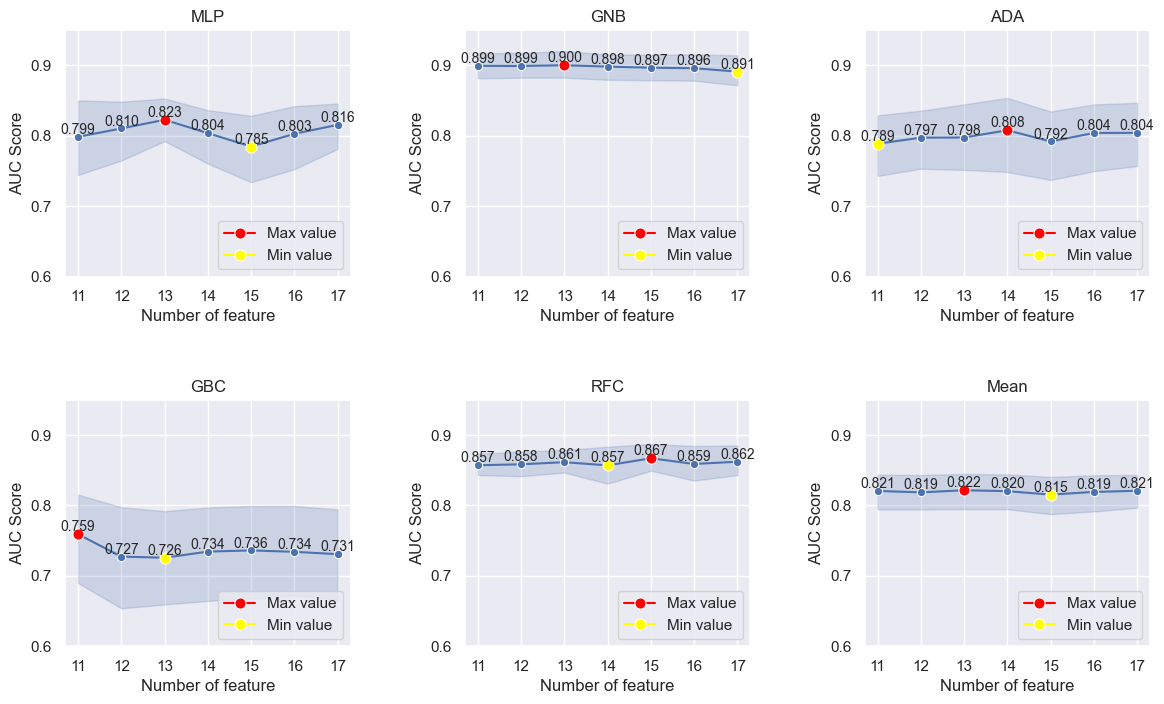

In [315]:
from sklearn.metrics import roc_auc_score

df_best_feat_score = df_best_feat_score.melt(id_vars=['Feat_number', 'Fold'], value_vars=algorithms, var_name='Algorithms', value_name='Score')
df_mean = a.copy()
df_mean['Algorithms'] = 'Mean'
df_best_feat_score = pd.concat([df_best_feat_score, df_mean])

df_feat_score = df_best_feat_score
import matplotlib.ticker as ticker

fig, ax = plt.subplots(2,3,figsize=(14, 8), gridspec_kw={'wspace': 0.4, 'hspace': 0.5})

for clf_index, clf_name in enumerate(df_feat_score.loc[:,'Algorithms'].unique()):
  
  # Set up data and axes
  clf_data = df_feat_score.loc[df_feat_score['Algorithms']==clf_name]
  clf_ax = ax[clf_index // 3,clf_index % 3]
    
  # Plot each algorithm performance
  sns.lineplot(data=clf_data, x='Feat_number', y='Score', ax=clf_ax, marker='o', markersize=6)
    
  # Adjust the graph  
  clf_ax.set_ylim([0.6,0.95]) # Set y limit
  clf_ax.set(ylabel='AUC Score') # Remove y label
  clf_ax.set(xlabel='Number of feature')
  clf_ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1)) # Set the gap between y ticker
  clf_ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) # Set the gap between y ticker
  clf_ax.set_title(f'{clf_name}') # Adding the tilte
  
  # Calculate mean score 
  mean_data = clf_data.groupby('Feat_number')['Score'].mean().reset_index()
  
  # Adding the text to data
  for x, y in mean_data[['Feat_number', 'Score']].values:
        clf_ax.text(x, y, f'{y:.3f}', ha='center', va='bottom', fontsize=10)

  # Calculate and mark the max score      
  max_index = mean_data['Score'].idxmax()
  max_value = mean_data.loc[max_index, 'Score']
  sns.lineplot(x=[mean_data.loc[max_index, 'Feat_number']], y=[max_value], ax=clf_ax, marker='o', markersize=8, color='red', label='Max value')
  
  # Calculate and mark the min score
  min_index = mean_data['Score'].idxmin()
  min_value = mean_data.loc[min_index, 'Score']
  sns.lineplot(x=[mean_data.loc[min_index, 'Feat_number']], y=[min_value], ax=clf_ax, marker='o', markersize=8, color='yellow', label='Min value')
  
  # Adding legend
  clf_ax.legend(loc='lower right')
  

In [27]:
df_best_feat_score = pd.read_csv('df_best_feat_score')
feat_selected = pd.read_csv("feat_selected.csv")
feat_selected.drop('Unnamed: 0', axis=1, inplace=True)
df_feat_selected = feat_selected

mask = df_corr['Correlation']>0.03
subset_columns = df_corr.Feature[mask].values
count = df_feat_selected['13'].apply(pd.Series).stack().value_counts()
count = count.sort_values(ascending=False)
df_count = pd.DataFrame(count.reset_index())
df_count.rename(columns={'index': 'Feature index', 0: 'Frequency'}, inplace=True)

df_count.iloc[0,0]
feature = df_count.iloc[0,0][1:-1].split(',')
list_feat = [int(feat.strip()) for feat in feature]
print(list_feat)

X = data.loc[:, subset_columns[list_feat]].values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 16]


## 2.3 Data Distribution (Skewness and Kurtosis)

For the **unknown features**:
* All of them have already been PCA (information from the datasource). Also, when investigating the data all of them are already put in the same scale (with **mean** approximately equal to **0** and **standard deviation** approximately equal to **1**)

For the **known features**:
* Apprently, **Time** and **Amount** feature **haven't been scaled** as other columns as we can see from their distribution, mean and std --> need to be scaled before training 
* To put them in the same scaled, I perform standard scaling on these features

### 2.2.1 Before handling skewed distribution

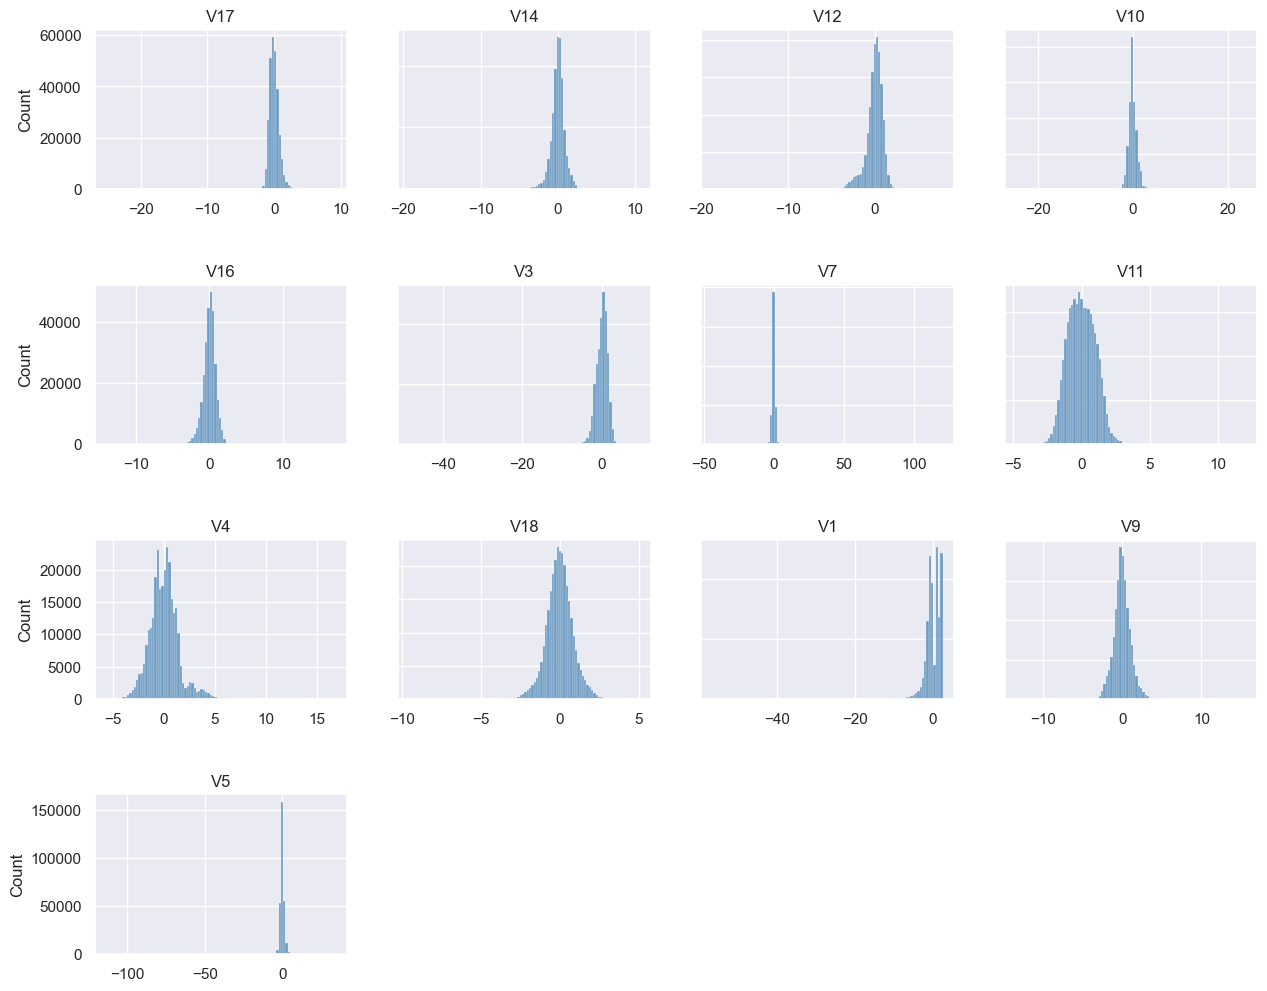

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 12))


for index_col, val_col in enumerate(data.loc[:, subset_columns]):
    ax = plt.subplot(4, 4, index_col + 1)

    sns.histplot(data[val_col].values, bins=100, color='steelblue')
    plt.title(f'{val_col}')

    if index_col % 4 != 0:
        ax.set(yticklabels=[])
        ax.set(ylabel='')

# Adjust spacing between subplots if necessary
plt.subplots_adjust(hspace=0.6)

# Show the plot
plt.show()

In [93]:
df_data_unknown = data.loc[:, subset_columns]

df_skewness = df_data_unknown.skew()
df_skewness = pd.DataFrame(df_skewness[abs(df_skewness)>3], columns=["Skewness"])
df_skewness

,Skewness
V17,-3.844914
V1,-3.280667


In [94]:
df_kurtosis = df_data_unknown.kurtosis()
df_kurtosis = pd.DataFrame(df_kurtosis[abs(df_kurtosis)>10], columns=["Kurtosis"])
df_kurtosis

,Kurtosis
V17,94.799719
V14,23.879462
V12,20.241870
V10,31.988239
V16,10.419131
V3,26.619551
V7,405.607417
V1,32.486679


In [ ]:
import re
list_skew = list(set(list(df_skewness.index)) | set(list(df_kurtosis.index)))

print(list_skew)

['V1', 'V14', 'V7', 'V16', 'V17', 'V10', 'V12', 'V3']


In [88]:
%time
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=10, max_train_size=None, test_size=None, gap=0)


# Make the prediction and take the probability
train_value = np.zeros([len(X), len(algorithms)], dtype = np.int32)
train_proba = np.zeros([len(X), len(algorithms)], dtype = np.int32)

pred_proba = np.zeros([len(X), len(algorithms)])
pred_value = np.zeros([len(X), len(algorithms)], dtype = np.int32)

for i, (train_index, test_index) in enumerate(tscv.split(X)):
    for clf_index, clf_name in enumerate(algorithms):
        classifiers[clf_name].fit(X[train_index], y[train_index])
        
        
        train_value[[train_index], clf_index:clf_index+1] = classifiers[clf_name].predict(X[train_index]).reshape(-1, 1)
        train_proba[[train_index], clf_index:clf_index+1] = classifiers[clf_name].predict_proba(X[train_index])[:, 1].reshape(-1, 1)
        
        print(clf_name)
        
        pred_proba[[test_index], clf_index:clf_index+1] = classifiers[clf_name].predict_proba(X[test_index])[:, 1].reshape(-1, 1)
        pred_value[[test_index], clf_index:clf_index+1] = classifiers[clf_name].predict(X[test_index]).reshape(-1, 1)
        
        # Calculate metrics
        metric = metric_score(y[test_index], pred_value[test_index, clf_index])
        sensi_score[i, clf_index] = metric.sensi_score()
        fallout_score[i, clf_index] = metric.fallout_score()
        auc_score[i, clf_index] = metric.auc_score()
        
        print(metric.sensi_score())
        print(metric.fallout_score())
        print(metric.auc_score())

# pred_proba_skew_bf = pred_proba
pred_value_skew_bf = pred_value.copy()
        
for clf_index, clf_name in enumerate(algorithms):
    print(clf_name)
    print('\nCV sensitivity: %.3f +/- %.3f' %(np.mean(sensi_score[:,clf_index]), np.std(sensi_score[:,clf_index])))
    print('\nCV fallout: %.3f +/- %.3f' %(np.mean(fallout_score[:,clf_index]), np.std(fallout_score[:,clf_index])))
    print('\nCV auc score: %.3f +/- %.3f' %(np.mean(auc_score[:,clf_index]), np.std(auc_score[:,clf_index])))

Wall time: 0 ns
MLP
0.1935483870967742
0.00011614851523481358
0.5967161192907697
GNB
0.9032258064516129
0.007007627085833753
0.9481090896828896
ADA
0.7580645161290323
0.00011614851523481358
0.8789741838068987
GBC
0.7903225806451613
0.00042587788919431645
0.8949483513779835
RFC
0.8548387096774194
0.00015486468697975143
0.9273419224952197
MLP
0.575
0.00011604966925844261
0.7874419751653707
GNB
0.7
0.007930060732660246
0.8460349696336699
ADA
0.575
7.736644617229508e-05
0.7874613167769139
GBC
0.525
0.0003094657846891803
0.7623452671076554
RFC
0.675
0.00015473289234459016
0.8374226335538277
MLP
0.6190476190476191
0.0
0.8095238095238095
GNB
0.7857142857142857
0.007079577546520175
0.8893173540838827
ADA
0.5476190476190477
0.0
0.7738095238095238
GBC
0.7142857142857143
3.8686216101203144e-05
0.8571235140348065
RFC
0.7142857142857143
0.0
0.8571428571428572
MLP
0.6206896551724138
0.0001933338488902637
0.8102481606617616
GNB
0.8275862068965517
0.009976026602737607
0.9088050901469071
ADA
0.55172413

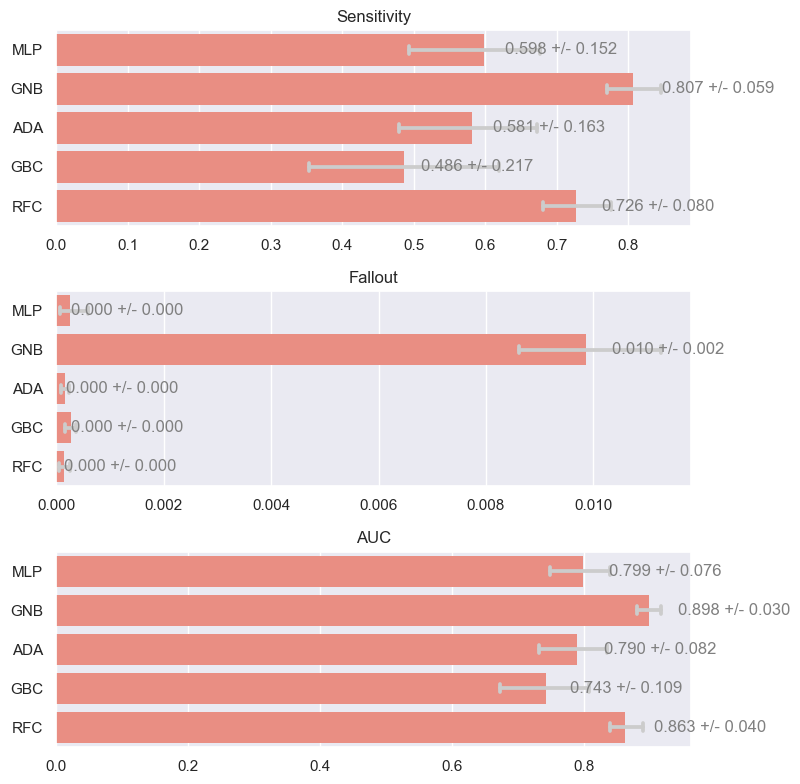

In [89]:
# save the result
dict_score_skew_bf = {'Sensitivity': sensi_score.copy(), 'Fallout' : fallout_score.copy(), 'AUC' : auc_score.copy()}

# Plot metrics           
plot_algo_comparison(dict_score_skew_bf)

### 2.2.2 After handling skewed distribution

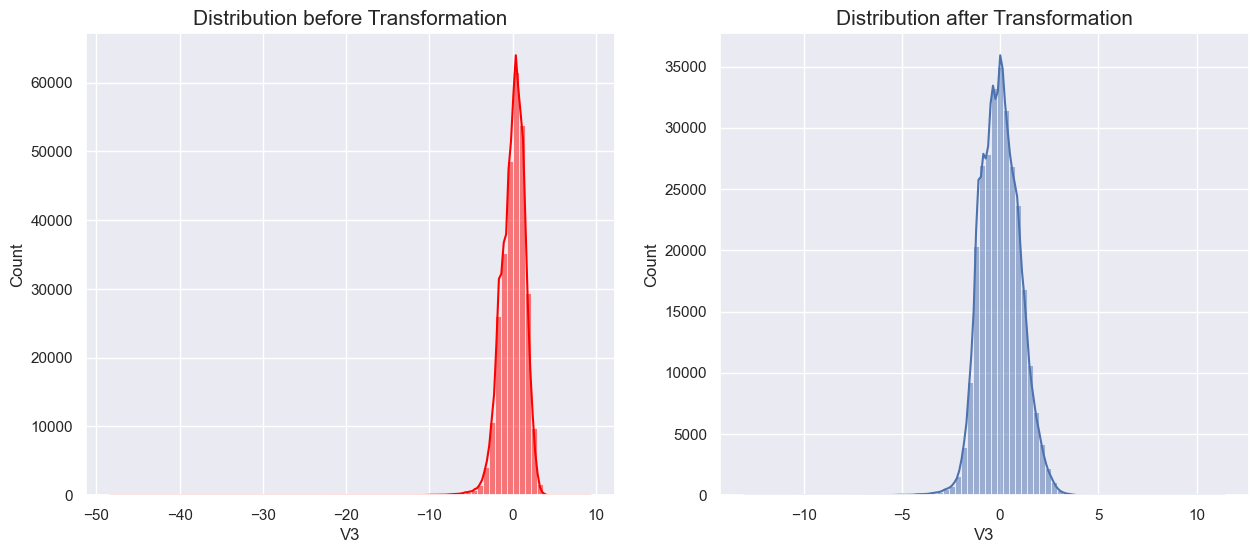

Skewness was -2.24 before & is -0.08 after Yeo-johnson transformation.
kurtosis was 26.62 before & is 1.63 after Yeo-johnson transformation.


In [8]:
yeojohntrans(feature="V3")

In [96]:
arr_tr = data.loc[:, list_skew].values

for index_feature, feature in enumerate(list_skew):
    print("\n",feature)
    old_skew = data.loc[:,[feature]].skew()
    old_kurtosis = data.loc[:,[feature]].kurtosis()
    
    yeojohnTr = PowerTransformer(standardize=True)
    df_yeojohn = pd.DataFrame(yeojohnTr.fit_transform(data[feature].values.reshape(-1,1)))
    
    if (abs(old_skew[feature]) < abs(df_yeojohn.skew()[0])) & (abs(old_kurtosis[feature]) < abs(df_yeojohn.kurtosis()[0])):
        list_skew.remove(feature)
        continue
    else:
        arr_tr[:,index_feature] = df_yeojohn.values.reshape(1,-1)
        print(f"Skewness was {round(old_skew[feature],2)} before & is {round(df_yeojohn.skew()[0],2)} after Yeo-johnson transformation.")
        print(f"kurtosis was {round(old_kurtosis[feature],2)} before & is {round(df_yeojohn.kurtosis()[0],2)} after Yeo-johnson transformation.")
    


 V1
Skewness was -3.28 before & is -0.22 after Yeo-johnson transformation.
kurtosis was 32.49 before & is -0.01 after Yeo-johnson transformation.

 V14
Skewness was -2.0 before & is 0.11 after Yeo-johnson transformation.
kurtosis was 23.88 before & is 9.11 after Yeo-johnson transformation.

 V7

 V17
Skewness was -3.84 before & is -0.79 after Yeo-johnson transformation.
kurtosis was 94.8 before & is 35.94 after Yeo-johnson transformation.

 V10

 V3
Skewness was -2.24 before & is -0.08 after Yeo-johnson transformation.
kurtosis was 26.62 before & is 1.63 after Yeo-johnson transformation.


In [97]:
list_skew = np.where(subset_columns == np.array(list_skew)[:, np.newaxis])[1]
list_skew

array([10,  1,  4,  0,  2,  5], dtype=int64)

In [98]:
%time
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

tscv = TimeSeriesSplit(n_splits=10, max_train_size=None, test_size=None, gap=0)


# Make the prediction and take the probability
train_value = np.zeros([len(X), len(algorithms)], dtype = np.int32)
train_proba = np.zeros([len(X), len(algorithms)], dtype = np.int32)

pred_proba = np.zeros([len(X), len(algorithms)])
pred_value = np.zeros([len(X), len(algorithms)], dtype = np.int32)

for i, (train_index, test_index) in enumerate(tscv.split(X)):
    print(f'Fold {i}')
    for clf_index, clf_name in enumerate(algorithms):
        transformer = ColumnTransformer(
            transformers=[('power_transform', PowerTransformer(standardize=True), list_skew) ])
        
        model = classifiers[clf_name]
        pipeline = Pipeline([('transformer', transformer), ('model', model)])
        pipeline.fit(X[train_index], y[train_index])
        
        # train_value[:, clf_index:clf_index+1] = classifiers[clf_name].predict(X_train).reshape(-1, 1)
        # train_proba[:, clf_index:clf_index+1] = classifiers[clf_name].predict_proba(X_train).reshape(-1, 1)
        
        print(clf_name)
        
        # pred_proba[[test_index], clf_index:clf_index+1] = pipeline.predict_proba(X[test_index])[:, 1].reshape(-1, 1)
        pred_value[[test_index], clf_index:clf_index+1] = pipeline.predict(X[test_index]).reshape(-1, 1)
        
        # Calculate metrics
        metric = metric_score(y[test_index], pred_value[test_index, clf_index])
        sensi_score[i, clf_index] = metric.sensi_score()
        fallout_score[i, clf_index] = metric.fallout_score()
        auc_score[i, clf_index] = metric.auc_score()
        
        print(metric.sensi_score())
        print(metric.fallout_score())
        print(metric.auc_score())
        
pred_value_skew_af = pred_value.copy()
        
        
for clf_index, clf_name in enumerate(algorithms):
    print(clf_name)
    print('\nCV sensitivity: %.3f +/- %.3f' %(np.mean(sensi_score[:,clf_index]), np.std(sensi_score[:,clf_index])))
    print('\nCV fallout: %.3f +/- %.3f' %(np.mean(fallout_score[:,clf_index]), np.std(fallout_score[:,clf_index])))
    print('\nCV auc score: %.3f +/- %.3f' %(np.mean(auc_score[:,clf_index]), np.std(auc_score[:,clf_index])))

Wall time: 0 ns
Fold 0
MLP
0.0967741935483871
0.00011614851523481358
0.5483290225165761
GNB
0.9032258064516129
0.001974524758991831
0.9506256408463106
ADA
0.7096774193548387
3.871617174493786e-05
0.854819351591547
GBC
0.7258064516129032
0.0004645940609392543
0.862670928775982
RFC
0.7741935483870968
0.0001935808587246893
0.8869999837641861
Fold 1
MLP
0.375
7.736644617229508e-05
0.6874613167769138
GNB
0.7
0.0022823101620827045
0.8488588449189587
ADA
0.25
3.868322308614754e-05
0.6249806583884568
GBC
0.725
0.0003481490077753278
0.8623259254961124
RFC
0.7
0.0001934161154307377
0.8499032919422845
Fold 2
MLP
0.6666666666666666
0.0
0.8333333333333333
GNB
0.7857142857142857
0.0035204456652094857
0.891096920024538
ADA
0.6904761904761905
3.8686216101203144e-05
0.8452187521300446
GBC
0.7380952380952381
0.0001934310805060157
0.8689509035073659
RFC
0.7380952380952381
0.0
0.8690476190476191
Fold 3
MLP
0.5862068965517241
0.0001933338488902637
0.7930067813514169
GNB
0.8275862068965517
0.004949346531590

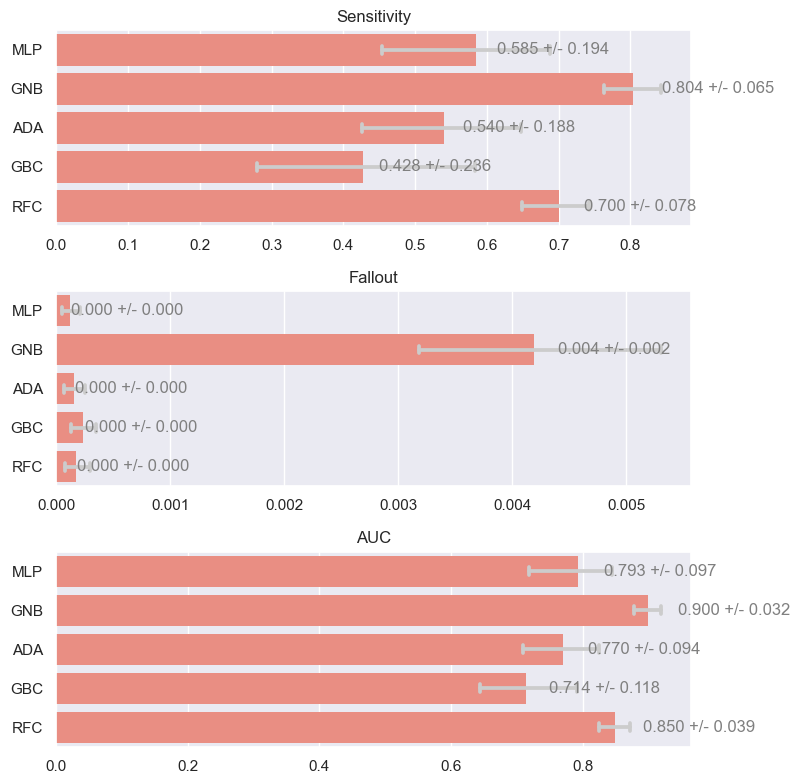

In [99]:
# save the result
dict_score_skew_af = {'Sensitivity': sensi_score.copy(), 'Fallout' : fallout_score.copy(), 'AUC' : auc_score.copy()}

plot_algo_comparison(dict_score_skew_af)

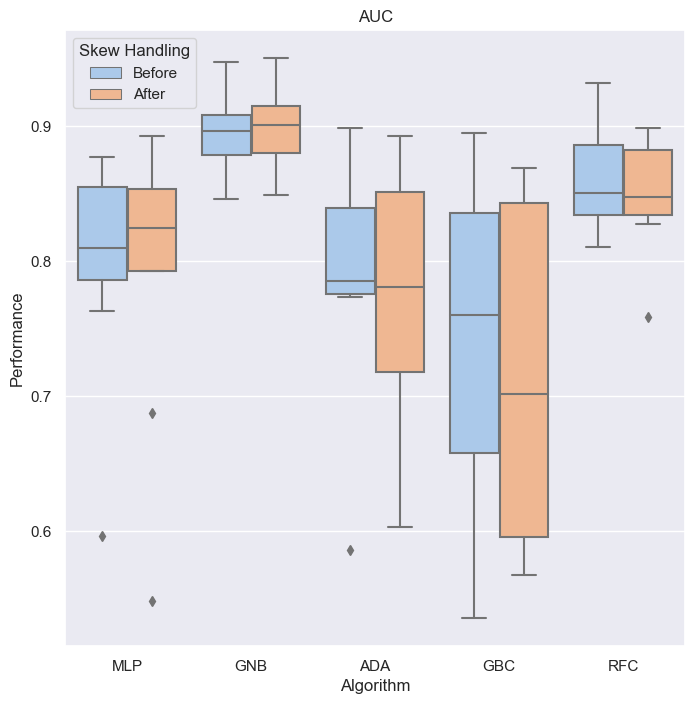

In [100]:
bf_af_comparison(dict_score_skew_bf, dict_score_skew_af, score="AUC", hue="Skew Handling")

## 2.4 Class Imbalance

### 2.4.1 Before Sampling

In [328]:
%time
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

tscv = TimeSeriesSplit(n_splits=10, max_train_size=None, test_size=None, gap=0)


# Make the prediction and take the probability
train_value = np.zeros([len(X), len(algorithms)], dtype = np.int32)
train_proba = np.zeros([len(X), len(algorithms)], dtype = np.int32)

pred_proba = np.zeros([len(X), len(algorithms)])
pred_value = np.zeros([len(X), len(algorithms)], dtype = np.int32)

for i, (train_index, test_index) in enumerate(tscv.split(X)):
    print(f'Fold {i}')
    for clf_index, clf_name in enumerate(algorithms):
        transformer = ColumnTransformer(
            transformers=[('power_transform', PowerTransformer(standardize=True), list_skew) ])
        
        model = classifiers[clf_name]
        if (clf_index<=1):
            pipeline = Pipeline([('transformer', transformer), ('model', model)])
        else:
            pipeline = Pipeline([('model', model)])
            
        pipeline.fit(X[train_index], y[train_index])
        
        # train_value[:, clf_index:clf_index+1] = classifiers[clf_name].predict(X_train).reshape(-1, 1)
        # train_proba[:, clf_index:clf_index+1] = classifiers[clf_name].predict_proba(X_train).reshape(-1, 1)
        
        print(clf_name)
        
        pred_proba[[test_index], clf_index:clf_index+1] = pipeline.predict_proba(X[test_index])[:, 1].reshape(-1, 1)
        pred_value[[test_index], clf_index:clf_index+1] = pipeline.predict(X[test_index]).reshape(-1, 1)
        
        # Calculate metrics
        metric = metric_score(y[test_index], pred_value[test_index, clf_index])
        sensi_score[i, clf_index] = metric.sensi_score()
        fallout_score[i, clf_index] = metric.fallout_score()
        auc_score[i, clf_index] = metric.auc_score()
        
        print(metric.sensi_score())
        print(metric.fallout_score())
        print(metric.auc_score())
        
pred_value_imba_bf = pred_value.copy()
        
for clf_index, clf_name in enumerate(algorithms):
    print(clf_name)
    print('\nCV sensitivity: %.3f +/- %.3f' %(np.mean(sensi_score[:,clf_index]), np.std(sensi_score[:,clf_index])))
    print('\nCV fallout: %.3f +/- %.3f' %(np.mean(fallout_score[:,clf_index]), np.std(fallout_score[:,clf_index])))
    print('\nCV auc score: %.3f +/- %.3f' %(np.mean(auc_score[:,clf_index]), np.std(auc_score[:,clf_index])))

Wall time: 0 ns
Fold 0
MLP
0.0967741935483871
0.00011614851523481358
0.5483290225165761
GNB
0.9032258064516129
0.001974524758991831
0.9506256408463106
ADA
0.7096774193548387
0.00015486468697975143
0.8547612773339295
GBC
0.7741935483870968
0.00034844554570444074
0.8869225514206961
RFC
0.7419354838709677
0.00015486468697975143
0.870890309591994
Fold 1
MLP
0.375
7.736644617229508e-05
0.6874613167769138
GNB
0.7
0.0022823101620827045
0.8488588449189587
ADA
0.45
0.00015473289234459016
0.7249226335538277
GBC
0.5
0.00023209933851688522
0.7498839503307416
RFC
0.675
0.00015473289234459016
0.8374226335538277
Fold 2
MLP
0.6666666666666666
0.0
0.8333333333333333
GNB
0.7857142857142857
0.0035204456652094857
0.891096920024538
ADA
0.7380952380952381
0.0
0.8690476190476191
GBC
0.7142857142857143
7.737243220240629e-05
0.8571041709267561
RFC
0.7142857142857143
0.0
0.8571428571428572
Fold 3
MLP
0.5862068965517241
0.0001933338488902637
0.7930067813514169
GNB
0.8275862068965517
0.004949346531590751
0.911318

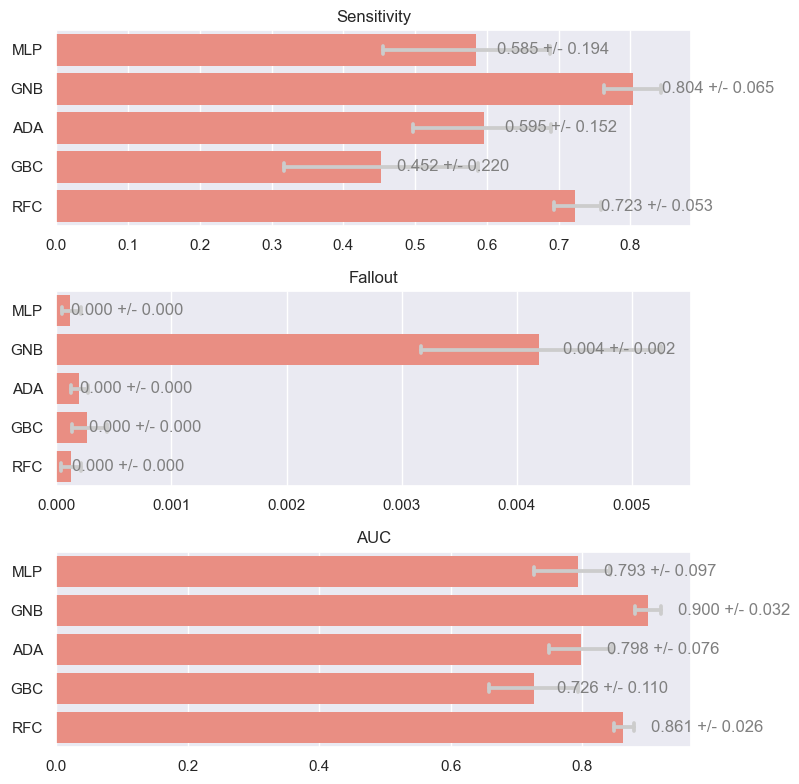

In [329]:
# save the result
dict_score_imba_bf = {'Sensitivity': sensi_score.copy(), 'Fallout' : fallout_score.copy(), 'AUC' : auc_score.copy()}

plot_algo_comparison(dict_score_imba_bf)

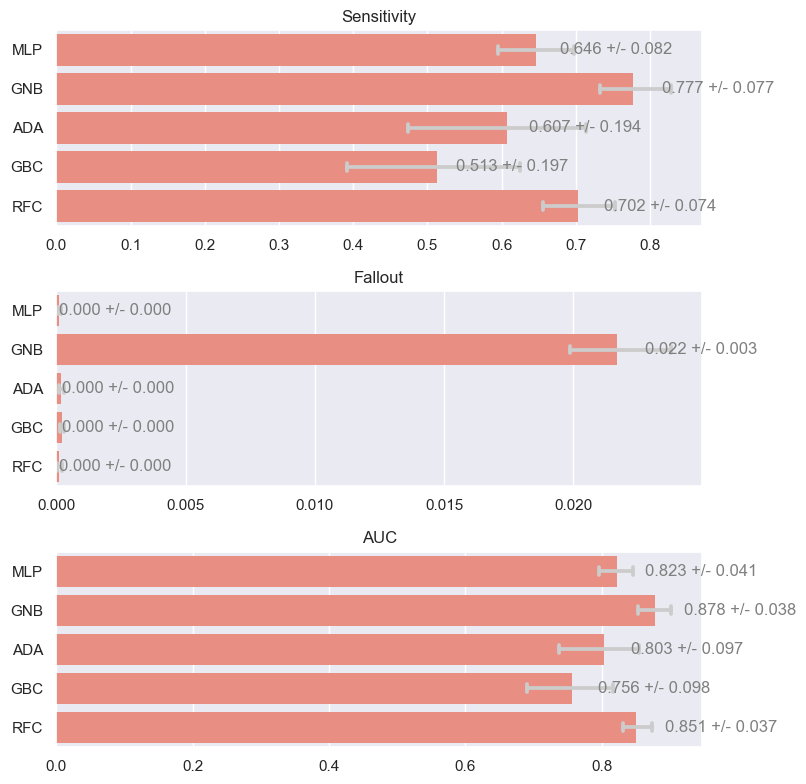

In [204]:
# save the result
# dict_score_imba_bf = {'Sensitivity': sensi_score.copy(), 'Fallout' : fallout_score.copy(), 'AUC' : auc_score.copy()}

plot_algo_comparison(dict_score_imba_bf)

### 2.4.2 After Sampling

In [331]:
from collections import Counter
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

smote = SMOTE(random_state=33)
adasyn = ADASYN(random_state=33)

#### 2.4.2.1 SMOTE

In [333]:
%time
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

tscv = TimeSeriesSplit(n_splits=10, max_train_size=None, test_size=None, gap=0)

pred_proba = np.zeros([len(X), len(algorithms)])
pred_value = np.zeros([len(X), len(algorithms)], dtype = np.int32)
train_proba = np.zeros([len(X), len(algorithms)])
train_value = np.zeros([len(X), len(algorithms)], dtype = np.int32)

for i, (train_index, test_index) in enumerate(tscv.split(X)):
    print(f'Fold {i}')
    X_train_resampled, y_train_resampled = BorderlineSMOTE(random_state=33).fit_resample(X[train_index], y[train_index])
    for clf_index, clf_name in enumerate(algorithms):
        
        transformer = ColumnTransformer(
                    transformers=[('power_transform', PowerTransformer(standardize=True), list_skew) ])
        model = classifiers[clf_name]
        
        
        model = classifiers[clf_name]
        
        if(clf_index<=1):
            pipeline = Pipeline([('transformer', transformer), ('model', model)])
        else:
            pipeline = Pipeline([('model', model)])
            
        pipeline.fit(X_train_resampled, y_train_resampled)
        
        train_value[train_index, clf_index:clf_index+1] = pipeline.predict(X[train_index]).reshape(-1, 1)
        train_proba[train_index, clf_index:clf_index+1] = pipeline.predict_proba(X[train_index])[:, 1].reshape(-1, 1)
        
        print(clf_name)
        
        pred_proba[[test_index], clf_index:clf_index+1] = pipeline.predict_proba(X[test_index])[:, 1].reshape(-1, 1)
        pred_value[[test_index], clf_index:clf_index+1] = pipeline.predict(X[test_index]).reshape(-1, 1)
        
        # Calculate metrics
        metric = metric_score(y[test_index], pred_value[test_index, clf_index])
        sensi_score[i, clf_index] = metric.sensi_score()
        fallout_score[i, clf_index] = metric.fallout_score()
        auc_score[i, clf_index] = metric.auc_score()
        
        print(metric.sensi_score())
        print(metric.fallout_score())
        print(metric.auc_score())

pred_value_imba_border = pred_value.copy()
train_value_imba_border = train_value.copy()
pred_proba_imba_border = pred_proba.copy()
train_proba_imba_border = train_proba.copy()

        
for clf_index, clf_name in enumerate(algorithms):
    print(clf_name)
    print('\nCV sensitivity: %.3f +/- %.3f' %(np.mean(sensi_score[:,clf_index]), np.std(sensi_score[:,clf_index])))
    print('\nCV fallout: %.3f +/- %.3f' %(np.mean(fallout_score[:,clf_index]), np.std(fallout_score[:,clf_index])))
    print('\nCV auc score: %.3f +/- %.3f' %(np.mean(auc_score[:,clf_index]), np.std(auc_score[:,clf_index])))

Wall time: 0 ns
Fold 0
MLP
0.8387096774193549
0.0007356072631538194
0.9189870350781005
GNB
0.9354838709677419
0.007820666692477447
0.9638316021376322
ADA
0.8064516129032258
0.00042587788919431645
0.9030128675070157
GBC
0.7096774193548387
0.0001935808587246893
0.8547419192480571
RFC
0.8064516129032258
0.00011614851523481358
0.9031677321939955
Fold 1
MLP
0.7
0.00046419867703377044
0.8497679006614832
GNB
0.725
0.011721016595102704
0.8566394917024487
ADA
0.7
0.0007736644617229508
0.8496131677691385
GBC
0.725
7.736644617229508e-05
0.862461316776914
RFC
0.65
3.868322308614754e-05
0.8249806583884569
Fold 2
MLP
0.7619047619047619
0.0004642345932144377
0.8807202636557737
GNB
0.7857142857142857
0.0098649851058068
0.8879246503042394
ADA
0.7857142857142857
0.001663507292351735
0.8920253892109669
GBC
0.7380952380952381
0.0003481759449108283
0.8688735310751636
RFC
0.7380952380952381
0.0
0.8690476190476191
Fold 3
MLP
0.7586206896551724
0.0010826695537854768
0.8787690100506934
GNB
0.8275862068965517
0

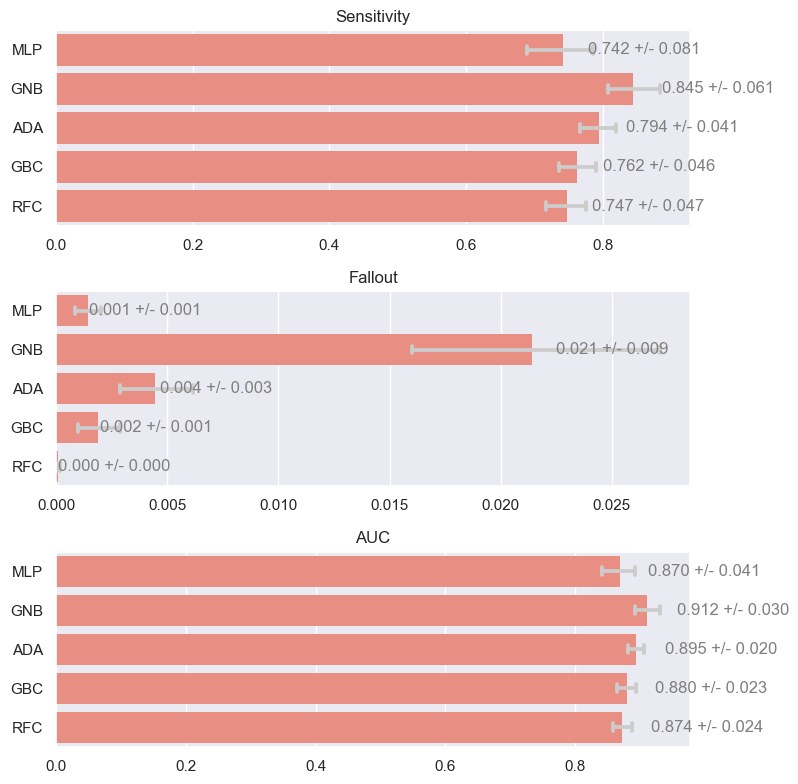

In [334]:
# save the result
dict_score_imba_border = {'Sensitivity': sensi_score.copy(), 'Fallout' : fallout_score.copy(), 'AUC' : auc_score.copy()}

plot_algo_comparison(dict_score_imba_border)

In [335]:
%time
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

tscv = TimeSeriesSplit(n_splits=10, max_train_size=None, test_size=None, gap=0)

pred_proba = np.zeros([len(X), len(algorithms)])
pred_value = np.zeros([len(X), len(algorithms)], dtype = np.int32)
train_proba = np.zeros([len(X), len(algorithms)])
train_value = np.zeros([len(X), len(algorithms)], dtype = np.int32)

for i, (train_index, test_index) in enumerate(tscv.split(X)):
    print(f'Fold {i}')
    X_train_resampled, y_train_resampled = SMOTE(random_state=33).fit_resample(X[train_index], y[train_index])
    for clf_index, clf_name in enumerate(algorithms):
        
        transformer = ColumnTransformer(
                    transformers=[('power_transform', PowerTransformer(standardize=True), list_skew) ])
        model = classifiers[clf_name]
        
        
        model = classifiers[clf_name]
        
        if(clf_index<=1):
            pipeline = Pipeline([('transformer', transformer), ('model', model)])
        else:
            pipeline = Pipeline([('model', model)])
            
        pipeline.fit(X_train_resampled, y_train_resampled)
        
        train_value[train_index, clf_index:clf_index+1] = pipeline.predict(X[train_index]).reshape(-1, 1)
        train_proba[train_index, clf_index:clf_index+1] = pipeline.predict_proba(X[train_index])[:, 1].reshape(-1, 1)
        
        print(clf_name)
        
        pred_proba[[test_index], clf_index:clf_index+1] = pipeline.predict_proba(X[test_index])[:, 1].reshape(-1, 1)
        pred_value[[test_index], clf_index:clf_index+1] = pipeline.predict(X[test_index]).reshape(-1, 1)
        
        # Calculate metrics
        metric = metric_score(y[test_index], pred_value[test_index, clf_index])
        sensi_score[i, clf_index] = metric.sensi_score()
        fallout_score[i, clf_index] = metric.fallout_score()
        auc_score[i, clf_index] = metric.auc_score()
        
        print(metric.sensi_score())
        print(metric.fallout_score())
        print(metric.auc_score())

pred_value_imba_SMOTE = pred_value.copy()
train_value_imba_SMOTE = train_value.copy()
pred_proba_imba_SMOTE = pred_proba.copy()
train_proba_imba_SMOTE = train_proba.copy()

        
for clf_index, clf_name in enumerate(algorithms):
    print(clf_name)
    print('\nCV sensitivity: %.3f +/- %.3f' %(np.mean(sensi_score[:,clf_index]), np.std(sensi_score[:,clf_index])))
    print('\nCV fallout: %.3f +/- %.3f' %(np.mean(fallout_score[:,clf_index]), np.std(fallout_score[:,clf_index])))
    print('\nCV auc score: %.3f +/- %.3f' %(np.mean(auc_score[:,clf_index]), np.std(auc_score[:,clf_index])))

Wall time: 0 ns
Fold 0
MLP
0.8709677419354839
0.0024004026481861474
0.934283669643649
GNB
0.9354838709677419
0.002787564365635526
0.9663481533010532
ADA
0.8225806451612904
0.0006194587479190057
0.9109805932066857
GBC
0.9032258064516129
0.0008904719501335708
0.9511676672507398
RFC
0.8064516129032258
0.00015486468697975143
0.903148374108123
Fold 1
MLP
0.725
0.003907005531700901
0.8605464972341496
GNB
0.725
0.005222235116629918
0.859888882441685
ADA
0.75
0.007117713047851147
0.8714411434760744
GBC
0.75
0.0030559746238056555
0.8734720126880972
RFC
0.725
7.736644617229508e-05
0.862461316776914
Fold 2
MLP
0.7619047619047619
0.0059576772795852835
0.8779735423125883
GNB
0.7857142857142857
0.008897829703276723
0.8884082280055045
ADA
0.8333333333333334
0.015513172656582459
0.9089100803383754
GBC
0.8571428571428571
0.008510967542264691
0.9243159448002962
RFC
0.7857142857142857
0.00011605864830360942
0.892799113532991
Fold 3


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP
0.8275862068965517
0.015041373443662517
0.9062724167264445
GNB
0.8275862068965517
0.010672028458742556
0.9084570892189044
ADA
0.8620689655172413
0.018366715644575052
0.9218511249363331
GBC
0.7931034482758621
0.009550692135179027
0.8917763780703416
RFC
0.7586206896551724
0.0003866676977805274
0.8791170109786959
Fold 4


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP
0.7752808988764045
0.010309278350515464
0.8824858102629445
GNB
0.9101123595505618
0.017944345399581427
0.9460840070754901
ADA
0.9101123595505618
0.02073482675761569
0.944688766396473
GBC
0.8539325842696629
0.01294473296643671
0.920493925651613
RFC
0.8202247191011236
0.000310053484226029
0.9099573328084488
Fold 5


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP
0.7857142857142857
0.017312671484329713
0.884200807114978
GNB
0.7857142857142857
0.010936352745681494
0.887388966484302
ADA
0.7857142857142857
0.025969007226494572
0.8798726392438955
GBC
0.7857142857142857
0.014723499632878619
0.8854953930407035
RFC
0.7857142857142857
0.00015457742396722958
0.8927798541451593
Fold 6


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP
0.7931034482758621
0.011329363544969454
0.8908870423654464
GNB
0.7931034482758621
0.011097362926301136
0.8910030426747805
ADA
0.8275862068965517
0.025172067125512336
0.9012070698855197
GBC
0.8275862068965517
0.013340035573428196
0.9071230856615617
RFC
0.7586206896551724
7.733353955610548e-05
0.8792716780578081
Fold 7


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP
0.7586206896551724
0.017593380249013996
0.8705136547030792
GNB
0.8620689655172413
0.012489366638311036
0.9247897994394652
ADA
0.8620689655172413
0.02652540406774418
0.9177717807247486
GBC
0.8620689655172413
0.015080040213440568
0.9234944626519004
RFC
0.7241379310344828
7.733353955610548e-05
0.8620302987474633
Fold 8


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP
0.8367346938775511
0.009945050692670846
0.9133948215924401
GNB
0.8367346938775511
0.00975156721615974
0.9134915633306956
ADA
0.9183673469387755
0.030299512421639193
0.9440339172585681
GBC
0.9183673469387755
0.015401284730284034
0.9514830311042457
RFC
0.7959183673469388
3.869669530222119e-05
0.8979398353258182
Fold 9


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP
0.7142857142857143
0.010746037881716273
0.8517698382019991
GNB
0.7619047619047619
0.010823347506764593
0.8755407071989986
ADA
0.7142857142857143
0.025976034016235022
0.8441548401347396
GBC
0.7142857142857143
0.014882102821801314
0.8497018057319565
RFC
0.7142857142857143
0.0005025125628140704
0.8568916008614501
MLP

CV sensitivity: 0.785 +/- 0.047

CV fallout: 0.010 +/- 0.005

CV auc score: 0.887 +/- 0.024
GNB

CV sensitivity: 0.822 +/- 0.062

CV fallout: 0.010 +/- 0.004

CV auc score: 0.906 +/- 0.031
ADA

CV sensitivity: 0.829 +/- 0.062

CV fallout: 0.020 +/- 0.009

CV auc score: 0.904 +/- 0.030
GBC

CV sensitivity: 0.827 +/- 0.062

CV fallout: 0.011 +/- 0.005

CV auc score: 0.908 +/- 0.031
RFC

CV sensitivity: 0.767 +/- 0.035

CV fallout: 0.000 +/- 0.000

CV auc score: 0.884 +/- 0.018


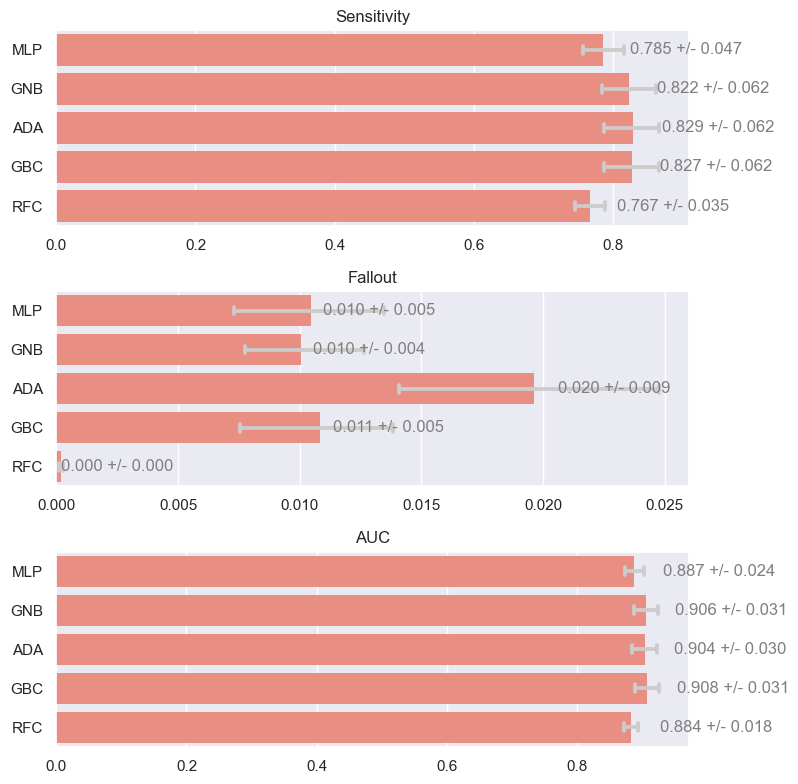

In [336]:
# save the result
dict_score_imba_SMOTE = {'Sensitivity': sensi_score.copy(), 'Fallout' : fallout_score.copy(), 'AUC' : auc_score.copy()}

plot_algo_comparison(dict_score_imba_SMOTE)

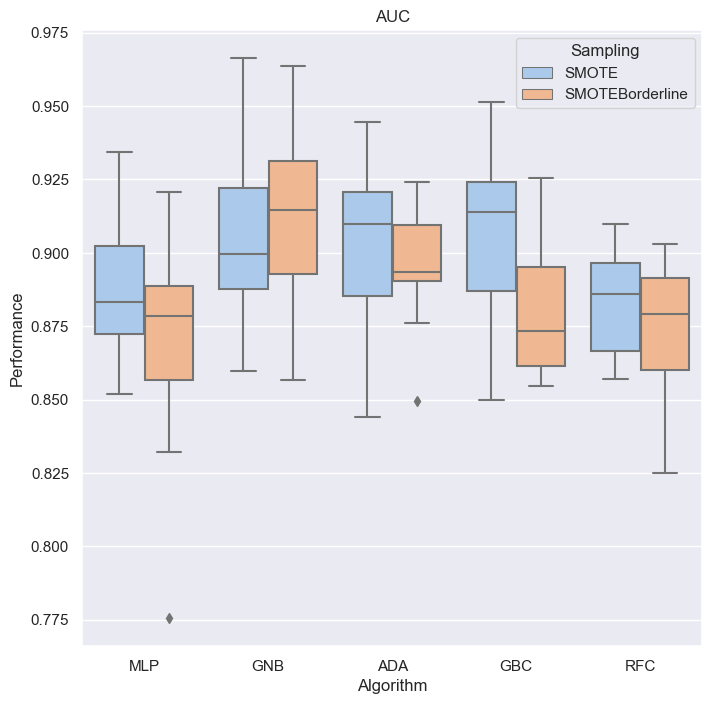

In [338]:
bf_af_comparison(dict_score_imba_SMOTE, dict_score_imba_border, score='AUC', bf='SMOTE', af='SMOTEBorderline')

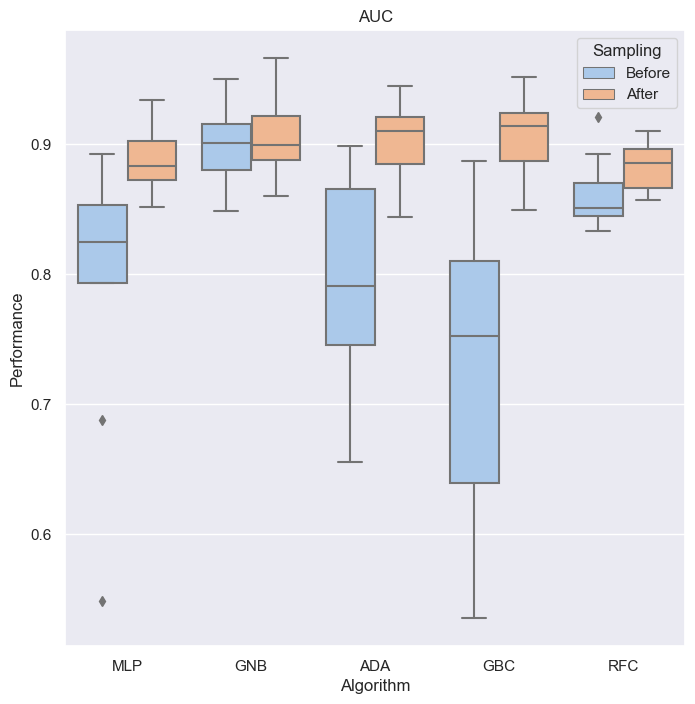

In [341]:
bf_af_comparison(dict_score_imba_bf, dict_score_imba_SMOTE, score='AUC')

#### 2.4.2.2 ADASYN

In [342]:
%time
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

tscv = TimeSeriesSplit(n_splits=10, max_train_size=None, test_size=None, gap=0)

pred_proba = np.zeros([len(X), len(algorithms)])
pred_value = np.zeros([len(X), len(algorithms)], dtype = np.int32)
train_proba = np.zeros([len(X), len(algorithms)])
train_value = np.zeros([len(X), len(algorithms)], dtype = np.int32)

for i, (train_index, test_index) in enumerate(tscv.split(X)):
    print(f'Fold {i}')
    X_train_resampled, y_train_resampled = ADASYN(random_state=33).fit_resample(X[train_index], y[train_index])
    for clf_index, clf_name in enumerate(algorithms):
        
        transformer = ColumnTransformer(
                    transformers=[('power_transform', PowerTransformer(standardize=True), list_skew) ])
        model = classifiers[clf_name]
        
        
        model = classifiers[clf_name]
        
        if(clf_index<=1):
            pipeline = Pipeline([('transformer', transformer), ('model', model)])
        else:
            pipeline = Pipeline([('model', model)])
            
        pipeline.fit(X_train_resampled, y_train_resampled)
        
        train_value[train_index, clf_index:clf_index+1] = pipeline.predict(X[train_index]).reshape(-1, 1)
        train_proba[train_index, clf_index:clf_index+1] = pipeline.predict_proba(X[train_index])[:, 1].reshape(-1, 1)
        
        print(clf_name)
        
        pred_proba[[test_index], clf_index:clf_index+1] = pipeline.predict_proba(X[test_index])[:, 1].reshape(-1, 1)
        pred_value[[test_index], clf_index:clf_index+1] = pipeline.predict(X[test_index]).reshape(-1, 1)
        
        # Calculate metrics
        metric = metric_score(y[test_index], pred_value[test_index, clf_index])
        sensi_score[i, clf_index] = metric.sensi_score()
        fallout_score[i, clf_index] = metric.fallout_score()
        auc_score[i, clf_index] = metric.auc_score()
        
        print(metric.sensi_score())
        print(metric.fallout_score())
        print(metric.auc_score())

pred_value_imba_adasyn = pred_value.copy()
train_value_imba_adasyn = train_value.copy()
pred_proba_imba_adasyn = pred_proba.copy()
train_proba_imba_adasyn = train_proba.copy()

        
for clf_index, clf_name in enumerate(algorithms):
    print(clf_name)
    print('\nCV sensitivity: %.3f +/- %.3f' %(np.mean(sensi_score[:,clf_index]), np.std(sensi_score[:,clf_index])))
    print('\nCV fallout: %.3f +/- %.3f' %(np.mean(fallout_score[:,clf_index]), np.std(fallout_score[:,clf_index])))
    print('\nCV auc score: %.3f +/- %.3f' %(np.mean(auc_score[:,clf_index]), np.std(auc_score[:,clf_index])))

Wall time: 0 ns
Fold 0
MLP
0.8870967741935484
0.0024004026481861474
0.9423481857726811
GNB
0.9516129032258065
0.013899105656432691
0.968856898784687
ADA
0.8225806451612904
0.0007356072631538194
0.9109225189490684
GBC
0.8870967741935484
0.0010066204653683844
0.94304507686409
RFC
0.7419354838709677
0.0001935808587246893
0.8708709515061216
Fold 1


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP
0.725
0.0034041236315809835
0.8607979381842097
GNB
0.725
0.01887741286604
0.85306129356698
ADA
0.8
0.0196123941046768
0.8901938029476616
GBC
0.775
0.008897141309813934
0.8830514293450931
RFC
0.725
0.00015473289234459016
0.8624226335538278
Fold 2


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP
0.7619047619047619
0.00603504971178769
0.8779348560964871
GNB
0.8333333333333334
0.027273782351348214
0.9030297754909926
ADA
0.8809523809523809
0.034585477194475606
0.9231834518789527
GBC
0.8809523809523809
0.02251537777090023
0.9292185015907404
RFC
0.7619047619047619
0.0001934310805060157
0.8808556654121279
Fold 3


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP
0.7241379310344828
0.011600030933415823
0.8562689500505335
GNB
0.8620689655172413
0.03278942077178872
0.9146397723727263
ADA
0.896551724137931
0.05131080349547599
0.9226204603212275
GBC
0.8275862068965517
0.029812079498878662
0.8988870636988365
RFC
0.7586206896551724
0.0005026680071146856
0.8790590108240288
Fold 4
MLP
0.8314606741573034
0.008914037671498334
0.9112733182429025
GNB
0.9550561797752809
0.051701418494690336
0.9516773806402952
ADA
0.8876404494382022
0.056856057669948064
0.915392195884127
GBC
0.898876404494382
0.03139291527788544
0.9337417446082483
RFC
0.8089887640449438
0.0005038369118672971
0.9042424635665383
Fold 5


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP
0.7857142857142857
0.019515399775862734
0.8830994429692114
GNB
0.7857142857142857
0.07949144027514782
0.8531114227195689
ADA
0.7857142857142857
0.08416740735015651
0.8507734391820646
GBC
0.7857142857142857
0.0496579974494725
0.8680281441324066
RFC
0.7857142857142857
0.00027051049194265177
0.8927218876111715
Fold 6


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP
0.7586206896551724
0.016704044544118786
0.8709583225555267
GNB
0.896551724137931
0.06867218312582167
0.9139397705060547
ADA
0.8275862068965517
0.07853220941922512
0.8745269987386632
GBC
0.8275862068965517
0.03858943623849664
0.8944983853290275
RFC
0.7586206896551724
7.733353955610548e-05
0.8792716780578081
Fold 7


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP
0.7586206896551724
0.019024050730801947
0.8697983194621852
GNB
0.8620689655172413
0.0642255046013456
0.898921730457948
ADA
0.8620689655172413
0.08123888330368881
0.8904150411067763
GBC
0.896551724137931
0.045510788028768075
0.9255204680545814
RFC
0.6896551724137931
0.00011600030933415822
0.8447695860522295
Fold 8


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP
0.8163265306122449
0.017684389753115082
0.899321070429565
GNB
0.8979591836734694
0.05850940329695844
0.9197248901882555
ADA
0.9387755102040817
0.0893119727575265
0.9247317687232777
GBC
0.9387755102040817
0.05042179397879421
0.9441768581126438
RFC
0.7959183673469388
0.0
0.8979591836734694
Fold 9


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP
0.7142857142857143
0.026478546579049092
0.8439035838533326
GNB
0.8571428571428571
0.0584460765365288
0.8993483903031643
ADA
0.7619047619047619
0.09068419018167762
0.8356102858615422
GBC
0.8095238095238095
0.052918438345574026
0.8783026855891177
RFC
0.7142857142857143
0.0004638577502899111
0.8569109282677123
MLP

CV sensitivity: 0.776 +/- 0.052

CV fallout: 0.013 +/- 0.008

CV auc score: 0.882 +/- 0.028
GNB

CV sensitivity: 0.863 +/- 0.067

CV fallout: 0.047 +/- 0.021

CV auc score: 0.908 +/- 0.035
ADA

CV sensitivity: 0.846 +/- 0.053

CV fallout: 0.059 +/- 0.030

CV auc score: 0.894 +/- 0.030
GBC

CV sensitivity: 0.853 +/- 0.052

CV fallout: 0.033 +/- 0.017

CV auc score: 0.910 +/- 0.027
RFC

CV sensitivity: 0.754 +/- 0.035

CV fallout: 0.000 +/- 0.000

CV auc score: 0.877 +/- 0.018


In [ ]:
pd.DataFrame(pred_value_imba_adasyn).to_csv('pred_value_imba_adasyn') 
pd.DataFrame(train_value_imba_adasyn).to_csv('train_value_imba_adasyn')
pd.DataFrame(pred_proba_imba_adasyn).to_csv('pred_proba_imba_adasyn')
pd.DataFrame(train_proba_imba_adasyn).to_csv('train_proba_imba_adasyn')

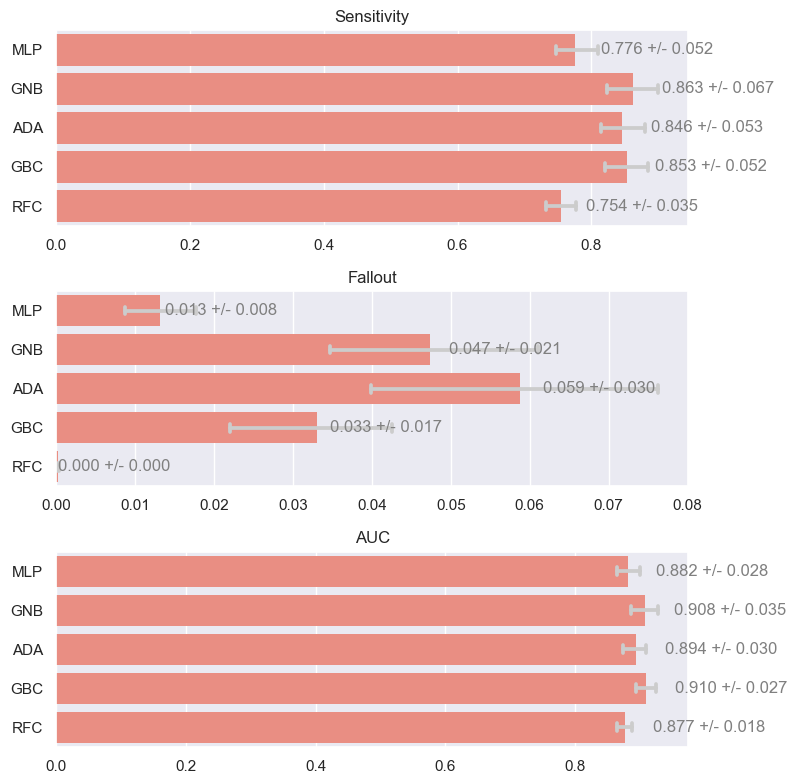

In [344]:
# save the result
dict_score_imba_ADASYN = {'Sensitivity': sensi_score.copy(), 'Fallout' : fallout_score.copy(), 'AUC' : auc_score.copy()}

plot_algo_comparison(dict_score_imba_ADASYN)

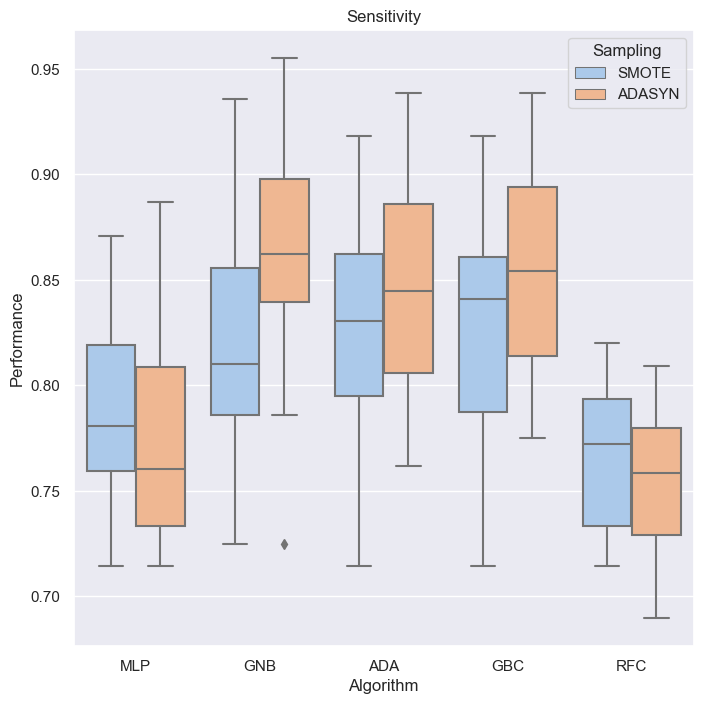

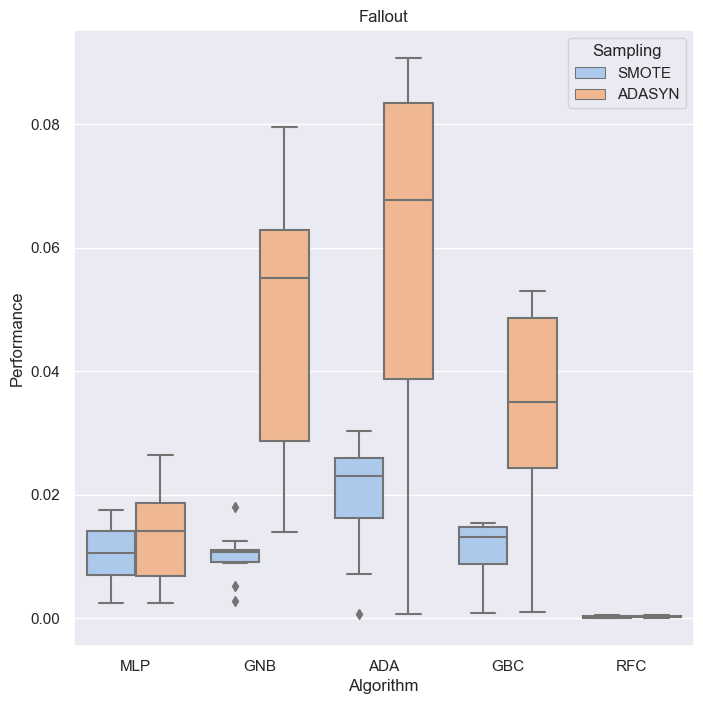

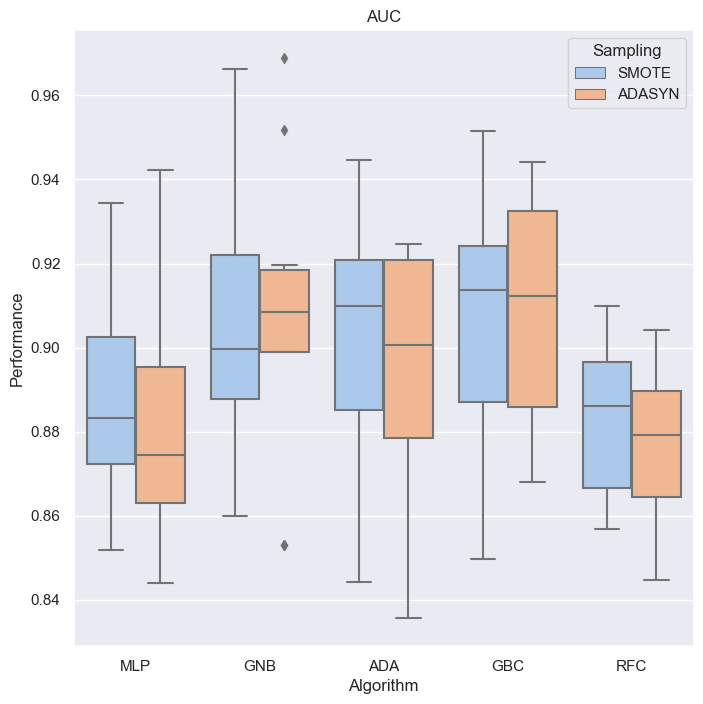

In [345]:
for metric in metrics:
    bf_af_comparison(dict_score_imba_SMOTE, dict_score_imba_ADASYN, score=metric, bf='SMOTE', af='ADASYN')

In [417]:
pd.DataFrame(pred_value_imba_adasyn, columns=algorithms).to_csv('pred_value_imba_adasyn.csv') 
pd.DataFrame(train_value_imba_adasyn, columns=algorithms).to_csv('train_value_imba_adasyn.csv') 
pd.DataFrame(pred_proba_imba_adasyn, columns=algorithms).to_csv('pred_proba_imba_adasyn.csv') 
pd.DataFrame(train_proba_imba_adasyn, columns=algorithms).to_csv('train_proba_imba_adasyn.csv') 

In [406]:
pd.DataFrame(pred_value_imba_SMOTE, columns=algorithms).to_csv('pred_value_imba_SMOTE.csv') 
pd.DataFrame(train_value_imba_SMOTE, columns=algorithms).to_csv('train_value_imba_SMOTE.csv') 
pd.DataFrame(pred_proba_imba_SMOTE, columns=algorithms).to_csv('pred_proba_imba_SMOTE.csv') 
pd.DataFrame(train_proba_imba_SMOTE, columns=algorithms).to_csv('train_proba_imba_SMOTE.csv') 

In [43]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=10, max_train_size=None, test_size=None, gap=0)

pred_value = pd.read_csv('pred_value_imba_adasyn.csv').values[:,1:]
train_value = pd.read_csv('train_value_imba_adasyn.csv').values[:,1:]
pred_proba = pd.read_csv('pred_proba_imba_adasyn.csv').values[:,1:]
train_proba = pd.read_csv('train_proba_imba_adasyn.csv').values[:,1:]
for i, (train_index, test_index) in enumerate(tscv.split(X)):
    for clf_index, clf_name in enumerate(algorithms):
        metric = metric_score(y[test_index], pred_value[test_index, clf_index])
        sensi_score[i, clf_index] = metric.sensi_score()
        fallout_score[i, clf_index] = metric.fallout_score()
        auc_score[i, clf_index] = metric.auc_score()
        
dict_score_imba_ADASYN = {'Sensitivity': sensi_score.copy(), 'Fallout' : fallout_score.copy(), 'AUC' : auc_score.copy()}

In [6]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=10, max_train_size=None, test_size=None, gap=0)

pred_value = pd.read_csv('pred_value_imba_SMOTE.csv').values[:,1:]
train_value = pd.read_csv('train_value_imba_SMOTE.csv').values[:,1:]
pred_proba = pd.read_csv('pred_proba_imba_SMOTE.csv').values[:,1:]
train_proba = pd.read_csv('train_proba_imba_SMOTE.csv').values[:,1:]
for i, (train_index, test_index) in enumerate(tscv.split(X)):
    for clf_index, clf_name in enumerate(algorithms):
        metric = metric_score(y[test_index], pred_value[test_index, clf_index])
        sensi_score[i, clf_index] = metric.sensi_score()
        fallout_score[i, clf_index] = metric.fallout_score()
        auc_score[i, clf_index] = metric.auc_score()
dict_score_imba_SMOTE = {'Sensitivity': sensi_score.copy(), 'Fallout' : fallout_score.copy(), 'AUC' : auc_score.copy()}

NameError: name 'algorithms' is not defined

## 3.Prudential Multiple Consensus Model

In [119]:
def PMC_comparison(dict_score_bf, dict_score_af, score='AUC', hue="Model", bf="Single Algorithm", af="PMC model", algorithms=classifiers.keys(), orient='v'):
    
    # Create DataFrame for bf data
    df_bf = pd.DataFrame(dict_score_bf[score], columns=algorithms)
    df_bf.reset_index(inplace=True)
    df_bf.rename(columns={"index": "Fold"}, inplace=True)
    df_bf.Fold +=1
    df_bf[hue] = bf
    
    # Create DataFrame for PMC data
    df_af = pd.DataFrame(dict_score_PMC[score])
    df_af.reset_index(inplace=True)
    df_af.rename(columns={"index": "Fold"}, inplace=True)
    df_af.Fold +=1
    df_af= df_af.drop(0, axis=1)
    for i in algorithms:
        df_af[i] = dict_score_PMC[score]
    df_af[hue] = af

    # Merge two DataFrame
    merged_df = pd.concat([df_bf, df_af])
    
    # Unpivot Data by each Fold and Sampling
    melted_df = pd.melt(merged_df, id_vars=['Fold', hue], var_name='Algorithm', value_name='Performance')
    
    #Plot boxplot for comparison
    fig_score, axes_score = plt.subplots(figsize=(10,8), nrows=1, ncols=1)
    if orient == 'v':
        sns.boxplot(x='Algorithm', y='Performance', hue=hue, data=melted_df, palette="pastel", ax=axes_score, orient=orient)
    else:
        sns.boxplot(x='Performance', y='Algorithm', hue=hue, data=melted_df, palette="pastel", ax=axes_score, orient=orient)
    axes_score.set_title(score)

## 3.1 Determine the optimal combination

**Original Prudential Multiple Consensus Model**

In [24]:
from itertools import combinations
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def PMC_model(algorithms, X_train, y_train, X_test, n_comb=5):
  
  comb = list(combinations(range(len(algorithms)), n_comb))
  result = np.zeros([len(X_test), len(comb)], dtype = np.int32)
    
  for comb_index, algo_index in enumerate(comb):
      algo_value = [algorithms[i] for i in algo_index]
      # print(algo_value)
    
      # Step 3: Calculate sigmoid mean of prediction
      proba = 1-pred_proba
      # proba_mean = np.array([np.mean(proba[test_index[0]+i, algo_index]) for i in range(len(X_test))])
      proba_mean = np.array([np.mean(pred_proba[test_index[0]+i, :]) for i in range(len(X_test))])

      # Step 4: Use majority vote for classification
      w1 = np.zeros(len(X), dtype = np.int32)
      w2 = np.zeros(len(X), dtype = np.int32)

      for i in range(len(X_test)):
        for j in algo_index:
          if (pred_value[i+test_index[0],j] == 0) and (proba[i+test_index[0],j] > proba_mean[i]):
            w1[i] += 1 
          else:
            w2[i] += 1

        if w1[i] < w2[i]:
          result[i,comb_index] += 1 

  return result

**Prudential Multiple Consensus Model (Run)**

In [44]:
from itertools import combinations

n_comb = 3
comb = list(combinations(range(len(algorithms)), n_comb))
algo_triples = []
Sensitivity = []
Fallout = [] 
AUC = []

pred_value_PMC  = np.zeros([len(y),len(list(comb))])
sensi_score_PMC = np.zeros([10, len(list(comb))])
fallout_score_PMC = np.zeros([10, len(list(comb))])
auc_score_PMC = np.zeros([10, len(list(comb))])


for i, (train_index, test_index) in enumerate(tscv.split(X)):
    pred_value_PMC[test_index] = PMC_model(algorithms[:], X[train_index], y[train_index], X[test_index], n_comb=n_comb)
    
    for comb_index, algo_index in enumerate(comb): 
        metric = metric_score(y[test_index], pred_value_PMC[test_index, comb_index])
        sensi_score_PMC[i,comb_index] = metric.sensi_score()
        fallout_score_PMC[i,comb_index] = metric.fallout_score()
        auc_score_PMC[i,comb_index] = metric.auc_score()

for comb_index, algo_index in enumerate(comb):
    algo_value = [algorithms[i] for i in algo_index]
    algo_triples.append(', '.join(algo_value))
    Sensitivity.append(round(np.mean(sensi_score_PMC[:,comb_index]),3))
    Fallout.append(round(np.mean(fallout_score_PMC[:,comb_index]),3))
    AUC.append(round(np.mean(auc_score_PMC[:,comb_index]),3))

df_algo_triples = pd.DataFrame(zip(algo_triples, Sensitivity, Fallout, AUC), columns=['Algorithm by triples', 'Sensitivity','Fallout','AUC']) 
df_algo_triples

,Algorithm by triples,Sensitivity,Fallout,AUC
0,"MLP, GNB, ADA",0.823,0.016,0.904
1,"MLP, GNB, GBC",0.830,0.013,0.909
2,"MLP, GNB, RFC",0.794,0.003,0.896
3,"MLP, ADA, GBC",0.845,0.028,0.909
4,"MLP, ADA, RFC",0.793,0.005,0.894
5,"MLP, GBC, RFC",0.794,0.004,0.895
6,"GNB, ADA, GBC",0.859,0.032,0.914
7,"GNB, ADA, RFC",0.821,0.012,0.905
8,"GNB, GBC, RFC",0.830,0.009,0.910
9,"ADA, GBC, RFC",0.843,0.026,0.909


In [33]:
df_algo_triples.to_csv('df_algo_triples.csv')

In [45]:
dict_score_PMC = {'Sensitivity': sensi_score_PMC[:,6].copy(), 'Fallout' : fallout_score_PMC[:,6].copy(), 'AUC' : auc_score_PMC[:,6].copy()}

In [423]:
from itertools import combinations

n_comb = 4
comb = list(combinations(range(len(algorithms)), n_comb))
algo_quadruples = []
Sensitivity = []
Fallout = [] 
AUC = []

pred_value_PMC  = np.zeros([len(y),len(list(comb))])
sensi_score_PMC = np.zeros([10, len(list(comb))])
fallout_score_PMC = np.zeros([10, len(list(comb))])
auc_score_PMC = np.zeros([10, len(list(comb))])


for i, (train_index, test_index) in enumerate(tscv.split(X)):
    pred_value_PMC[test_index] = PMC_model(algorithms[:], X[train_index], y[train_index], X[test_index], n_comb=n_comb)
    
    for comb_index, algo_index in enumerate(comb): 
        metric = metric_score(y[test_index], pred_value_PMC[test_index, comb_index])
        sensi_score_PMC[i,comb_index] = metric.sensi_score()
        fallout_score_PMC[i,comb_index] = metric.fallout_score()
        auc_score_PMC[i,comb_index] = metric.auc_score()

for comb_index, algo_index in enumerate(comb):
    algo_value = [algorithms[i] for i in algo_index]
    algo_quadruples.append(', '.join(algo_value))
    Sensitivity.append(round(np.mean(sensi_score_PMC[:,comb_index]),3))
    Fallout.append(round(np.mean(fallout_score_PMC[:,comb_index]),3))
    AUC.append(round(np.mean(auc_score_PMC[:,comb_index]),3))

df_algo_quadruples = pd.DataFrame(zip(algo_quadruples, Sensitivity, Fallout, AUC), columns=['Algorithm by quadruples', 'Sensitivity','Fallout','AUC'])
df_algo_quadruples

,Algorithm by quadruples,Sensitivity,Fallout,AUC
0,"MLP, GNB, ADA, GBC",0.820,0.010,0.905
1,"MLP, GNB, ADA, RFC",0.793,0.002,0.895
2,"MLP, GNB, GBC, RFC",0.794,0.002,0.896
3,"MLP, ADA, GBC, RFC",0.793,0.004,0.894
4,"GNB, ADA, GBC, RFC",0.818,0.008,0.905


In [432]:
df_algo_quadruples.to_csv('df_algo_quadruples.csv')

In [424]:
from itertools import combinations

n_comb = 5
comb = list(combinations(range(len(algorithms)), n_comb))
algo_all = []
Sensitivity = []
Fallout = [] 
AUC = []

pred_value_PMC  = np.zeros([len(y),len(list(comb))])
sensi_score_PMC = np.zeros([10, len(list(comb))])
fallout_score_PMC = np.zeros([10, len(list(comb))])
auc_score_PMC = np.zeros([10, len(list(comb))])


for i, (train_index, test_index) in enumerate(tscv.split(X)):
    pred_value_PMC[test_index] = PMC_model(algorithms[:], X[train_index], y[train_index], X[test_index], n_comb=n_comb)
    
    for comb_index, algo_index in enumerate(comb): 
        metric = metric_score(y[test_index], pred_value_PMC[test_index, comb_index])
        sensi_score_PMC[i,comb_index] = metric.sensi_score()
        fallout_score_PMC[i,comb_index] = metric.fallout_score()
        auc_score_PMC[i,comb_index] = metric.auc_score()

for comb_index, algo_index in enumerate(comb):
    algo_value = [algorithms[i] for i in algo_index]
    print(algo_value)
    algo_all.append(', '.join(algo_value))
    Sensitivity.append(round(np.mean(sensi_score_PMC[:,comb_index]),3))
    Fallout.append(round(np.mean(fallout_score_PMC[:,comb_index]),3))
    AUC.append(round(np.mean(auc_score_PMC[:,comb_index]),3))

df_algo_all = pd.DataFrame(zip(algo_all, Sensitivity, Fallout, AUC), columns=['Algorithms', 'Sensitivity','Fallout','AUC'])
df_algo_all

['MLP', 'GNB', 'ADA', 'GBC', 'RFC']


,Algorithms,Sensitivity,Fallout,AUC
0,"MLP, GNB, ADA, GBC, RFC",0.82,0.01,0.905


In [363]:
dict_score_PMC = {'Sensitivity': sensi_score_PMC.copy(), 'Fallout' : fallout_score_PMC.copy(), 'AUC' : auc_score_PMC.copy()}

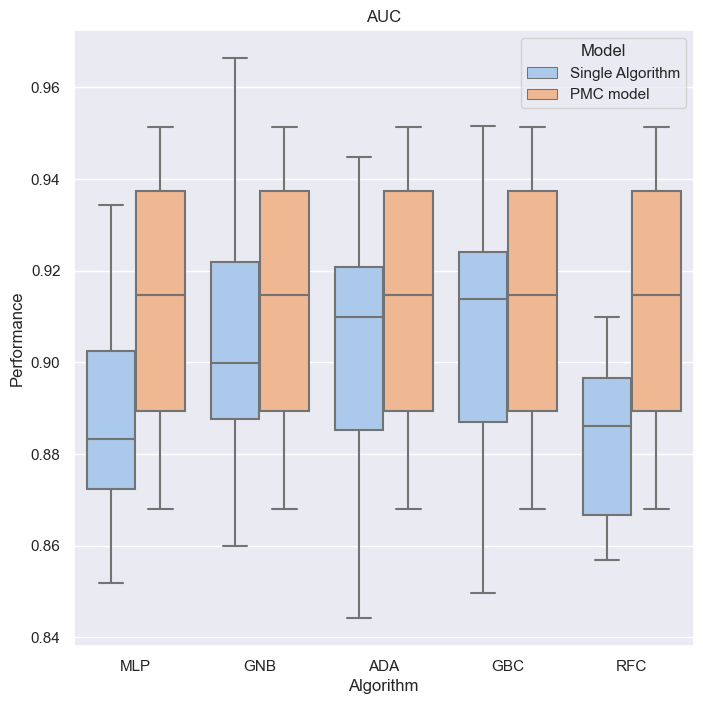

In [39]:
PMC_comparison(dict_score_imba_SMOTE, dict_score_PMC, score='AUC')

In [40]:
pd.DataFrame(dict_score_PMC,columns=metrics).to_csv('dict_score_PMC.csv')

In [25]:
dict_score_PMC = pd.read_csv('dict_score_PMC.csv')

## 3.2 Ensemble Models Comparison

#### Complete Agreement approach


In [13]:
def CompletementAgreement(algorithms, X_train, y_train, X_test):
  
  # Step 4: Use majority vote for classification
  w1 = np.zeros(len(X_test), dtype = np.int32)
  result = np.zeros(len(X_test), dtype = np.int32)

  for i in range(len(X_test)):
    for j in range(len(algorithms)):
        if pred_value[i+test_index[0], j] == 1:
            w1[i] += 1 
    if w1[i] == 5:
        result[i] = 1 

  return result

#### Majority Vote Approach

In [14]:
def MajorityVoting(algorithms, X_train, y_train, X_test):
  
  w1 = np.zeros(len(X_test), dtype = np.int32)
  w2 = np.zeros(len(X_test), dtype = np.int32)
  result = np.zeros(len(X_test), dtype = np.int32)

  for i in range(len(X_test)):
    for j in range(len(algorithms)):
      if pred_value[i+test_index[0],j] == 0:
        w1[i] += 1 
      else:
        w2[i] += 1

    if w1[i] < w2[i]:
      result[i] = 1 

  return result

#### Weighted Voting Approach

In [15]:
from sklearn.metrics import accuracy_score


def WeightedVoting(algorithms, X_train, y_train, X_test):
  
  # Step 3: Define weight for each algorithm
  weighted = np.array([np.log(1-pred_proba[i+test_index[0], :]) / np.log(pred_proba[i+test_index[0], :])+0.01 for i in range(len(X_test))])


  # Step 4: Use majority vote for classification
  w1 = np.zeros(len(X_test), dtype = np.float64)
  w2 = np.zeros(len(X_test), dtype = np.float64)
  result = np.zeros(len(X_test), dtype = np.int32)

  for i in range(len(X_test)):
    for j in range(len(algorithms)):
      if pred_value[i+test_index[0]][j] == 0: 
        
        w1[i] += weighted[i, j]
      else:
        w2[i] += weighted[i, j]

    if w1[i] > w2[i]:
      result[i] = 0 
    else:
      result[i] = 1

  return result

#### Classifier Selection Approach

In [16]:
from sklearn.neighbors import NearestNeighbors
k = 5

def ClassifierSelection(algorithms, X_train, y_train, X_test, k=5):


  # Step 2: Find the k nearest neighbors for each data point
  neigh = NearestNeighbors(n_neighbors=k, metric='euclidean')
  neigh.fit(X_train)


  # Step 4: Iteriate through each data point
  clf_selected = np.zeros([k, len(algorithms)]) 
  result = np.zeros(len(X_test))

  for i in range(len(X_test)):
    # Get the indices of the k nearest neighbors
    neighbors = neigh.kneighbors([X_test[i]], return_distance=False)[0]

    for index_neighbor, neighbor in enumerate(neighbors):
      clf_selected[index_neighbor, :] = list(map(int, train_value[index_neighbor, :] == y_train[neighbor]))

    count_selected = clf_selected.sum(axis =0)
    index_selected = np.argmax(count_selected)
    result[i] = pred_value[i+test_index[0], index_selected]

  return result

#### Relational Approach

In [17]:
from itertools import combinations 


def PairwiseAccuracy(algorithms, X_train, y_train, X_test, labels = 2):
  
  # Step 1: Create all possible pairs of classifiers:
  algo_comb = list(combinations(np.arange(len(algorithms)), 2))


  # Step 2: Initialize set U for both correctly and incorrectly classify instances
  U = np.zeros( [len(algorithms), len(X_train)] , dtype = np.int32)
  for clf in range(len(algorithms)):
    U[clf, :] = np.array((train_value[train_index, clf] == y_train), dtype = np.int32)


  # Step 3: Initialize subset I and Ie for correctly and incorrectly classify instances, respectively
  I = [[] for i in range(len(algorithms))]
  Ie = [[] for i in range(len(algorithms))]

  for clf_index, clf_value in enumerate(U):
    for index, value in enumerate(clf_value):
      if value == 1:
        I[clf_index].append(index)
      else:
        Ie[clf_index].append(index)


  # Step 4: Calculate shared accuracy and Shared Mistake 
  S_acc = np.zeros(len(algo_comb))
  S_err = np.zeros(len(algo_comb))

  for index, (ci, cj) in enumerate(algo_comb):
    S_acc[index] = len(list((set(I[ci]) & set(I[cj])))) / len(X_train)
    S_err[index] = len(list((set(Ie[ci]) & set(Ie[cj])))) / len(X_train)


  # Step 5: Calculate accuracy of each algorithm
  acc = np.zeros(len(algorithms))

  for ci in range(len(algorithms)):
    acc[ci] = len(I[ci]) / len(X_train)


  # Step 6: Calculate weight for each label and make prediction
  labels = 2
  v = np.zeros([len(X_test), labels])
  result = np.zeros(len(X_test))

  for i in range(len(X_test)):
    for pair, (ci, cj) in enumerate(algo_comb):
        v[i, pred_value[i+test_index[0], ci]] += S_acc[pair] - S_err[pair] if pred_value[i+test_index[0], ci] == pred_value[i+test_index[0], cj] else acc[ci] - S_acc[pair]
        v[i, pred_value[i+test_index[0], cj]] += acc[cj] - S_acc[pair] if  pred_value[i+test_index[0], ci] != pred_value[i+test_index[0], cj] else 0
  result = np.argmax(v, axis=1)
  return result


#### Store the all the approaches

In [18]:
from sklearn.ensemble import VotingClassifier

ensemble_model =["Complete Agreement", "Majority Voting", "Weighted Voting", "Classifier Selection", "Pairwise Accuracy"]

estimator = []
for clf_name in algorithms:
   estimator.append(tuple([clf_name,classifiers[clf_name]]))
   
ensemble_classifiers = {
  "Complete Agreement": CompletementAgreement,
  "Majority Voting": MajorityVoting,
  "Weighted Voting": WeightedVoting,
  "Classifier Selection": ClassifierSelection,
  "Pairwise Accuracy": PairwiseAccuracy,
    }

# Initialize metrics
metrics = ['Sensitivity', 'Fallout', 'AUC']
ensemble_sensi_score = np.zeros([10,5])
ensemble_fallout_score = np.zeros([10,5])
ensemble_auc_score = np.zeros([10,5])

dict_ensemble_score = {'Sensitivity': ensemble_sensi_score, 'Fallout' : ensemble_fallout_score, 'AUC' : ensemble_auc_score}

In [20]:
ensemble_pred_value  = np.zeros(len(y))

for ensemble_index, ensemble_value in enumerate(ensemble_model):
    print(ensemble_value)
    for i, (train_index, test_index) in enumerate(tscv.split(X)):
        ensemble_pred_value[test_index] = ensemble_classifiers[ensemble_value](algorithms, X[train_index], y[train_index], X[test_index])
        
        metric = metric_score(y[test_index], ensemble_pred_value[test_index])
        ensemble_sensi_score[i, ensemble_index] = metric.sensi_score()
        ensemble_fallout_score[i, ensemble_index] = metric.fallout_score()
        ensemble_auc_score[i, ensemble_index] = metric.auc_score()

    print('\nCV auc score: %.3f +/- %.3f' %(np.mean(ensemble_auc_score[:, ensemble_index]), np.std(ensemble_auc_score[:, ensemble_index])))

Complete Agreement

CV auc score: 0.874 +/- 0.013
Majority Voting

CV auc score: 0.904 +/- 0.028
Weighted Voting


C:\Users\Admin\AppData\Local\Temp\ipykernel_15692\1419187286.py:7: RuntimeWarning: divide by zero encountered in log
  weighted = np.array([np.log(1-pred_proba[i+test_index[0], :]) / np.log(pred_proba[i+test_index[0], :])+0.01 for i in range(len(X_test))])
C:\Users\Admin\AppData\Local\Temp\ipykernel_15692\1419187286.py:7: RuntimeWarning: divide by zero encountered in log
  weighted = np.array([np.log(1-pred_proba[i+test_index[0], :]) / np.log(pred_proba[i+test_index[0], :])+0.01 for i in range(len(X_test))])
C:\Users\Admin\AppData\Local\Temp\ipykernel_15692\1419187286.py:7: RuntimeWarning: divide by zero encountered in log
  weighted = np.array([np.log(1-pred_proba[i+test_index[0], :]) / np.log(pred_proba[i+test_index[0], :])+0.01 for i in range(len(X_test))])
C:\Users\Admin\AppData\Local\Temp\ipykernel_15692\1419187286.py:7: RuntimeWarning: divide by zero encountered in log
  weighted = np.array([np.log(1-pred_proba[i+test_index[0], :]) / np.log(pred_proba[i+test_index[0], :])+0.01 fo


CV auc score: 0.775 +/- 0.074
Classifier Selection

CV auc score: 0.887 +/- 0.024
Pairwise Accuracy
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
[[9.63671468 0.        ]
 [9.63671468 0.        ]
 [9.63671468 0.        ]
 ...
 [9.63671468 0.        ]
 [9.63671468 0.        ]
 [9.63671468 0.        ]]
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
[[9.69575964 0.        ]
 [9.69575964 0.        ]
 [9.69575964 0.        ]
 ...
 [9.69575964 0.        ]
 [9.69575964 0.        ]
 [9.69575964 0.        ]]
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
[[9.71626823 0.        ]
 [9.71626823 0.        ]
 [9.71626823 0.        ]
 ...
 [9.71626823 0.        ]
 [9.71626823 0.        ]
 [9.71626823 0.        ]]
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
[[9.72810659 0.        ]
 [9.72810659 0.       

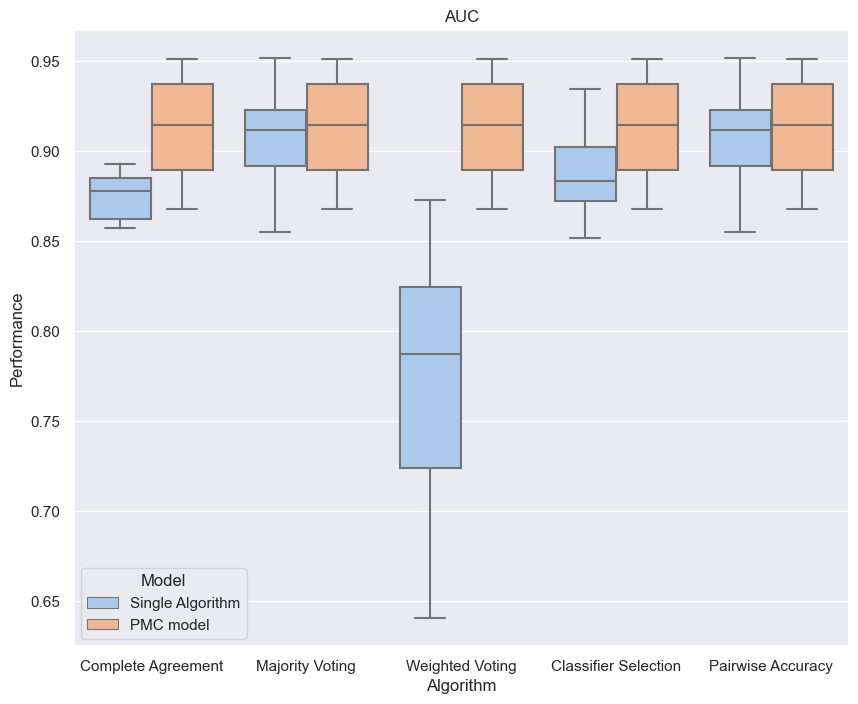

In [120]:
dict_score_ensemble = {"Sensitivity":ensemble_sensi_score, "Fallout":ensemble_fallout_score, "AUC":ensemble_auc_score}

PMC_comparison(dict_score_ensemble, dict_score_PMC, score='AUC', algorithms=ensemble_model, orient='v')

In [102]:
dict_score_ensemble = {"Sensitivity":ensemble_sensi_score, "Fallout":ensemble_fallout_score, "AUC":ensemble_auc_score}
df_score_ensemble = pd.DataFrame(zip(ensemble_sensi_score.mean(axis=0),  ensemble_fallout_score.mean(axis=0), ensemble_auc_score.mean(axis=0)),
                                     index=ensemble_model, columns=metrics)
df_score_ensemble = pd.concat([df_score_ensemble, pd.DataFrame([[dict_score_PMC['Sensitivity'].mean(),  dict_score_PMC['Fallout'].mean(), dict_score_PMC['AUC'].mean()]],
                                     index=['PMC Model'], columns=metrics)], axis=0)
df_score_ensemble = round(df_score_ensemble,3)
df_score_ensemble

,Sensitivity,Fallout,AUC
Complete Agreement,0.748,0.000,0.874
Majority Voting,0.812,0.003,0.904
Weighted Voting,0.585,0.035,0.775
Classifier Selection,0.785,0.010,0.887
Pairwise Accuracy,0.812,0.003,0.904
PMC Model,0.859,0.032,0.914
